# Chapter 2: Risk Metrics #
&copy; 2022 Kenneth Winston

If risk is _lack of information about the future_, and measurement is _the act of determining a quantity with precision_, then the phrase **`risk measurement`** is at war with itself. It is only possible to measure [Knightian risk](#knightian_risk), where all the outcomes and all their probabilities are known [a priori](#knight_a_priori). Thus a casino can <u>measure</u> the risk that a lucky bettor will win a million dollars at roulette.

But real-world economic activity cannot be fully described by [Knightian risk](#knightian_risk), so risk in financial markets cannot really be measured. It can only be <u>estimated</u>. At best, there might be extensive empirical experience with a relevant quantity, along with a strong rational basis for certain kinds of behaviors, that allow the analyst to estimate risk with a high degree of confidence. At worst, a situation might fall into the abyss of Knight's lowest category where "there is no valid basis of any kind" to classify risks.

Estimating **`risk metrics`** is a worthwhile activity: it imparts discipline and transparency to the process of analyzing risk. Discipline and transparency in turn allow the metrics, and the process of estimating them, to improve over time. However, the usual caution applies: false precision needs to be counterbalanced by common sense.

One of the oldest risk metrics is volatility: the more a quantity varies, the less sure we are about its future. We will discuss this metric here and in Chapter 4. We'll also discuss Value at Risk, a metric widely used by some financial market participants, along with related metrics. We'll discuss coherent risk measures, also intended for use by financial market participants.

We'll then discuss pricing kernels, also known as stochastic discount factors and intertemporal marginal rates of substitution. Pricing kernels are not widely used by financial market participants, but are a central paradigm for economists. We'll discuss some recent work that has improved the testability of stochastic discount factor theory, although widespread practitioner use of the theory remains elusive.

## 2.1 Caveat Laws
<a name="caveat_laws"></a>

Many commentators have captured the problem with the phrase _risk measurement_, or indeed any "measurement" of economic or financial parameters: when patterns begin to emerge in measurements made of markets and economies, the participants in those markets and economies see the patterns and change their behaviors, changing the patterns.

An early version of this sentiment is **`Goodhart's Law`**, named after British economist Charles Goodhart's statement in 1974:
>Any statistical relationship will break down when used for policy purposes.

Goodhart was talking about Frank Knight's second category of risk &mdash; [statistical probability](#knight_statistical_probability) &mdash; in the context of public policy targets set by the [Bank of England](https://www.bankofengland.co.uk/about/history), the central bank of the United Kingdom. As soon as economic actors know that there is a target, they will alter their behavior so that (for example) events that only happened $1\%$ of the time in the past now happen more often.

Goodhart's Law was extended by [J&oacute;n Dan&iacute;elsson in 2002](https://doi.org/10.1016/S0378-4266(02)00263-7) to say
>A risk model breaks down when used for its intended purpose.

Dan&iacute;elsson pointed out that some people assume in error that
>...the role of the risk forecaster is akin to a meteorologists job, who can forecast the weather, but not influence it. [But] if risk measurements influence people's behavior, it is inappropriate to assume market prices follow an independent stochastic process.

Similarly, most economists are keenly aware of the [Nobel Laureate Robert Lucas's](https://www.nobelprize.org/prizes/economic-sciences/1995/lucas/biographical) version of the idea, called the **`Lucas Critique`**.[$^1$](#two_footnotes) Lucas claimed that econometric models &mdash; once again, essentially Knight's [statistical probability](#knight_statistical_probability) &mdash; can be used only for short-term forecasting and not to make economic policy decisions because
>...the features which lead to success in short-term forecasting are unrelated to quantitative policy evaluation, that the major econometric models are (well) designed to perform the former task only, and that simulations using these models can, in principle, provide <u>no</u> useful information as to the actual consequences of alternative economic policies.

So to continue Dan&iacute;elsson's meteorologist analogy, Lucas says that examining past economic patterns may help to predict the weather for the short term, but it doesn't tell you how to change the weather.

These cautionary statements are daunting; if nothing works, then why bother? An answer can be obtained by thinking about these two statements:
1. All humans are giraffes, except the ones who aren't.
2. All humans have five fingers on each hand, except the ones who don't.
<a name="five_fingers"></a>

Both statements are true, but the first one is only vacuously true: everyone falls into the exception category. But as an approximation to human fingerness, five is pretty good: there aren't that many exceptions. For many practical purposes &mdash; for example, for a glove manufacturer setting up a mold for its glove-making machine &mdash; it suffices to say that humans have five fingers on each hand. However if someone were to bet a billion dollars that every human has five fingers on each hand, [polydactyl people](https://medlineplus.gov/ency/article/003176.htm) would arrive to disprove the hypothesis and collect the billion dollars:

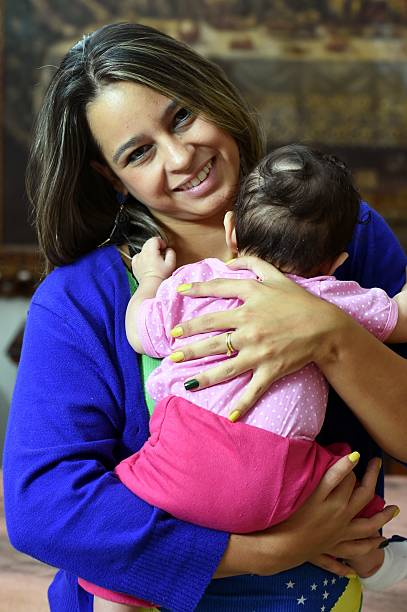

The statistician George Box managed to extract an optimistic take on the inevitable fallibility of human attempts to capture the world in numbers:
>All models are wrong, but some are useful.[$^2$](#two_footnotes)

His anti-law is now widely cited, sometimes with frustration and sometimes with hope. Our rendering of this common theme is:
>All laws in quantitative finance have counterexamples, except this one.

### 2.1.1 Portfolio Insurance ###

To illustrate the caveats we've just seen, we'll consider the **`portfolio insurance`** strategy. This is a method that purports to allow an investor to participate in up-moves in markets while avoiding down-moves, which sounds quite delightful. In fact portfolio insurance has been implicated in the US stock market crash of October 19, 1987: that day's $22.6\%$ drop in the Dow Jones Industrial Average was the worst ever.

The original idea of portfolio insurance is from [Mark Rubenstein and Hayne Leland 1981](https://doi.org/10.2469/faj.v37.n4.63). The basic portfolio insurance strategy consists of maintaining a mix of stocks and bonds, and adjusting the proportion so that more stock is bought (sold) after the stock market has gone up (down) relative to bonds. Leland and Rubenstein, along with John O'Brien, formed a company (Leland O'Brien Rubenstein Associates, or LOR) that offered this strategy to institutional investor clients like pension and endowment funds. LOR became quite successful, managing tens of billions of dollars.

A simplified version, called constant proportion portfolio insurance ("CPPI"), is due to [Perold and Black 1992](https://doi.org/10.1016/0165-1889(92)90043-E). It works like this:
1. Choose a protection time period $T$ and a leverage ratio $\lambda$. Set $t=T$. Suppose an amount $100$ is to be invested. Set $P(t)=100$.
2. Compute the current floor value $F(t)$ of risk-free bonds that will be worth $100$ at time $t$ in the future. For example, if $t=5$ years and the $5$-year risk-free rate is $4.56%$, $F(5)=80$.
3. Allocate $min(\lambda(P(t)-F(t)),P(t))$ to stock and the rest to bonds. For example if $\lambda=3$, $P(t)=100$, and $F(t)=80$, allocate $60$ to stock and $40$ to bonds.
4. At regular intervals, update $t$ (how much time is remaining until the original protection time period is reached) and the current value of the stock-bond portfolio $P(t)$. When $t=0$, stop. Otherwise go back to step 2.

Continuing the example, suppose that one year has passed so that remaining $t=4$, and that no rebalancing (Step 3) has been done since inception. Suppose that $F(4)=84$. That means the bond portion of the portfolio is worth $40\frac{84}{80}=42$. Suppose the stock portion of the portfolio has gone from $60$ to $70$. Then the portfolio is worth $P(4)=70+42=112$. Step 3 says to allocate $3(112-84)=84$ to stock. Thus the CPPI manager would buy $84-70=14$ more stock and sell $14$ of bonds, leaving $42-14=28$ in bonds.

While different forms of portfolio insurance have different formulas, this illustrates the basic nature of portfolio insurance. If the stock market does well, then the portfolio's value $P(t)$ will be larger than the floor value $F(t)$. As the cushion $P(t)-F(t)$ gets larger, more and more risk is taken by allocating more and more to stock. As the cushion shrinks, less risk is taken. If things go poorly enough, there will be no cushion and the portfolio will be $100\%$ invested in bonds. Once that happens, there is no possibility of buying stock again until the protection period ends.

In this way the CPPI method tries to keep the value of the portfolio above $F(t)$ with time $t$ remaining, aiming to have at least $100$ at the end of the protection period. That's the "insurance" part, although there isn't really an insurance company or a guarantee. If the stock market gaps sharply downward before a Step 3 reallocation can be done, there might not be $100$ at the end. Otherwise, the CPPI portfolio hopes to enjoy the upside of a stock allocation by investing the over-floor amount in the stock market. The larger the leverage ratio $\lambda$, the more aggressive the method is in deploying the over-floor amount to stocks.

This means that the method buys more stock after stocks have done well and sells stock after stocks have done poorly. This reveals the **`procyclical`** nature of portfolio insurance: it wants to keep going in the same direction that the market went. If a procyclical strategy is followed by enough market participants, the market can become a runaway train either on the upside or the downside as buying (selling) begets more buying (selling).

The popularity of LOR and other portfolio insurance methods grew during the 1980s. By October 19, 1987, tens of billions of dollars were moving procyclically. Portfolio insurance became what is called a **`crowded trade`**" a large enough part of the market that it affected the market, creating a negative feedback loop. In a [February 18, 1988 speech](https://www.sec.gov/news/speech/1988/021888ruder.pdf) then [Securities and Exchange Commission](www.sec.gov) chair David Ruder said that "great selling pressure [was] exacerbated on October 19th and 20th by large stock and futures sales by institutions pursuing a variety of arbitrage and portfolio insurance strategies."

While other post-mortems have assigned varying degrees of culpability to portfolio insurance, all analyses agree that there was a stampede on October 19, 1987 as market participants panicked:
>Given the uncertainty, investors apparently sought to sell and close out their positions. With the dearth of reliable information, herd behavior reportedly became common. Robert Shiller surveyed market participants promptly after the crash and many conveyed to him that, on the day of the crash, they were reacting more to the price movements than to any particular news.[$^3$](#two_footnotes)

Dan&iacute;elsson's meteorologist anti-analogy is apt here: portfolio insurance and other procyclical strategies assume the participants are mere observers. If that is true, then it can be shown theoretically that a CPPI strategy is similar to buying some bonds and a call option, which is equivalent to buying some stock and a put option (insurance).

In order for that theoretical finding to hold, the act of following a portfolio insurance strategy should not cause herd behavior. But it does: under enough stress, following the allocation formula affects the allocation formula. If there are enough participants doing similar procyclical strategies,[$^4$](#two_footnotes) they will cause herd behavior even among those not pursuing those strategies as market participants "[react] more to the price movements than to any particular news." A market where participants are reacting only to price movements is unmoored from external reality such as the financial health of the economy or of the companies traded in the market.

The mathematics of finance and economics can be beautiful and deep, and resulting metrics can be appealingly precise, but they are not really binding as they would be in mathematics or physics. There are always exceptions, some of them engendered by the very act of stating the "theorem" or "law." A liberal application of common sense is needed to see whether or not we are inadvertently encouraging searches for polydactyly or procyclical strategies. But if results and metrics are seen as guides to intuition rather than irrevocable laws, they can be quite useful.

## 2.2 Volatility ##

Neuroscientists using functional magnetic resonance imaging (fMRI) have found that human (and other species, such as macaque monkey) brains seem to have built-in systems to monitor and update volatility estimates. Peter Bossaerts summarized the state of the art as of [December 2018](https://doi.org/10.3389/fnint.2018.00061):
>Learning signals that have been identified in neural activation within aIns [anterior insula] appear to be related to risk and surprise. That is, neural signals correlate with the size of prediction errors (PEs), i.e., the un-signed PE (it is always non-negative) (Fouragnan et al., [2017](https://doi.org/10.1038/s41598-017-04507-w), [2018](https://doi.org/10.1002/hbm.24047)). aIns neural signals encode the anticipated size of upcoming PEs, which means that they track risk. When uncertainty materializes, aIns neural signals encode surprise, i.e., the extent to which the size of the PE is greater or less than anticipated (Preuschoff et al., [2008](https://doi.org/10.1523/JNEUROSCI.4286-07.2008)).

[Behrens et. al. in 2007](https://doi.org/10.1038/nn1954) did experiments using a game where subjects needed to estimate both averages and volatilities to do better. They found
>...that human subjects assess volatility in an optimal manner and adjust decision-making accordingly. This optimal estimate of volatility is reflected in the fMRI signal in the anterior cingulate cortex (ACC) when each trial outcome is observed. When a new piece of information is witnessed, activity levels reflect its salience for predicting future outcomes.

We [noted](#central_moments) that the word "volatility" usually means standard deviation
$$\sigma=\sqrt{\mathbb{E}\bigl[\bigl(x-\mathbb{E}[x]\bigr)^2\bigr]}$$
This is a natural number to quantify _lack of information about the future_; the bigger the standard deviation of (say) changes in a value, the bigger the chance that the future value will be far away from the present value (plus the average change). A related quantity that is used in some of the neuroscience investigations is **`mean absolute deviation`**, i.e.
$$MAD=\mathbb{E}\bigl[\bigl|x-\mathbb{E}[x]\bigr|\bigr]\label{eq:mean_absolute_deviation}\tag{2.1}$$
For a normal distribution, $MAD=\sqrt{\frac{2}{\pi}}\sigma$. Standard deviation generally gives more weight to outliers than MAD.

fMRI tests are not needed to demonstrate the instinctive assessment of volatility; you can immediately see it. Consider the two time series randomly generated in Figure 2.1. The horizontal axis is time, and the vertical axis represents the time-varying value of an original dollar invested at time zero:

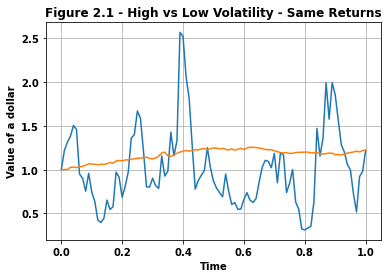

In [1]:
#Generate a high volatility and a low volatility price series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.arange(0,1.01,.01)
rng = np.random.default_rng(27182818)   #Use seed so repeatable
r1=rng.normal(loc=0.,scale=.3,size=100)
r2=rng.normal(loc=0.,scale=.01,size=100)
#Force both series to end up in the same place
r1+=.002-np.average(r1)
r2+=.002-np.average(r2)
#Start both series at a value of 1 and
#switch from log(pnew/pold-1) to pnew/pold-1
y1=np.append(np.array(1),np.exp(np.cumsum(r1)))
y2=np.append(np.array(1),np.exp(np.cumsum(r2)))
plt.title("Figure 2.1 - High vs Low Volatility - Same Returns")
plt.xlabel('Time')
plt.ylabel('Value of a dollar')
plt.grid()
plt.plot(x,y1)
plt.plot(x,y2);

Here standard deviation has been used for volatility; the blue time series in Figure 2.1 was generated with 30 times the standard deviation of the orange time series. They have been forced to end up in the same place - the starting dollar at time period $0$ grows to $\$1.22$ at time period $1$. But if you were asked to predict where each time series would be at future time period $2$, you would instinctively have much more confidence predicting that the low-volatility orange time series would continue to grow at about the same pace between period $1$ and period $2$ as it did between period $0$ and period $1$. It would be very difficult to make any prediction about where the blue series would be at time period $2$.

Sometimes **`downside semi-variance`** or its square root, **`downside semi-standard-deviation`** is used:
$$\sigma_{down}^2=\frac{\int_{-\infty}^{\mu}(x-\mu)^2\cdot dF(x)}{F(\mu)}\label{eq:downside_semi}\tag{2.2}$$
Here $\mu$ is the mean of the distribution. Some writers have favored $\sigma_{down}$ on the basis of a supposed indifference to "upside risk." If risk is [peril](#peril_vs_venture) then this might make sense: the focus would mainly be on the bad outcomes.

However if risk is [venture](#peril_vs_venture), then the justification for using $\sigma_{down}$ is less obvious. For example, consider the following two distributions, each with the four equally likely outcomes shown:
- Distribution A: $-5\%, -2\%, 3.5\%, 3.5\%$<br>
- Distribution B: $-5\%, -2\%, 0.1\%, 6.9\%$<br>

These both average zero and have the same downside semi-variance. Distribution B has a higher overall variance, reflecting the bigger range of upside possibilities. If we care about the upside &mdash; which we do when we are engaged in venture portfolio management rather than peril portfolio management &mdash; the overall variance is more informative.

Some practitioners use **`interquartile range`** as a risk measure. If $F$ is a cdf, then its interquartile range is
$$IQR(F)=F^{-1}(.75)-F^{-1}(.25)$$
More generally, the **`inter-p-tile range`** is
$$IR(p,F)=F^{-1}(1-p)-F^{-1}(p)\label{eq:interptile_range}\tag{2.3}$$
Ranges fit nicely with the intuition of risk as lack of information about the future, because smaller ranges mean more is known and bigger ranges mean less is known. For example the interdecile range $IR(.1,F)$ gives the length of the $80\%$ confidence interval about the median. Ranges are also easy to compute for both empirical and theoretical distributions.

Ultimately probability distributions can be arbitrarily complex so compressing all the information in the cdf $F(x)$ into a single number is not going to work. We can try to optimize the amount of information we get from a single scalar metric &mdash; some are better than others depending on the context &mdash; but ultimately multiple metrics are needed.

## 2.3 VaR, ES, cVaR, and Spectral Measures ##
<a name="value_at_risk"></a>

A natural question to ask when making a risky investment is: how bad can things get?

The problem with this question is that there's no limit to the range of possibilities. Whatever terrible situation we can imagine can usually be one-upped by an even more terrible one. At some point we [descend into absurdity](https://xkcd.com/2261/), speculating perhaps that evil aliens with hopelessly superior technology land on Earth and destroy all human life. This grisly scenario is so unrealistic that there's nothing we could or should do about it. Such extreme speculation is not a guide to actions we should take now.

A more interesting question is: how bad are the things that can realistically happen that we might have a chance of planning for and doing something about? This seems more down-to-earth, but we need to know what "realistically" means.

A measure called **`Value at Risk`** (or VaR[$^5$](#two_footnotes)) was created to answer the question "how bad can things get _realistically_." It's now widely used and, in some cases, [required by financial regulators](https://www.govinfo.gov/content/pkg/CFR-2012-title12-vol3/pdf/CFR-2012-title12-vol3-part225-appE.pdf) to be computed and acted on. 

VaR is simply a percentile of a probability distribution of a financial quantity of interest. The quantity is usually either:
- _P&L_ (profit&loss, i.e. change in wealth from the current wealth); or
- _Rate of return_ or just _return_ of wealth; that's ending wealth divided by beginning wealth, all minus one;
- _Log-return_, which is the logarithm of one plus the rate of return.

Note that all of these quantities can in general take on both positive and negative values. Value at Risk is concerned with how much can be lost, so the convention is to reverse the sign in a way we'll describe below, giving bigger positive numbers for bigger losses.[$^6$](#two_footnotes)

Let $X$ be the random variable giving the future value of whichever one of the quantities above is being analyzed, and let $F_t(x)$ be the cumulative distribution function (cdf) of $X$'s value at some time $t$ in the future. The Value at Risk (VaR) over time $t>0$ with probability $0\leq p\leq 1$ is:
$$VaR_t(p)=-\inf\{x\mid F_t(x)=Pr(X\le x)\ge 1-p\}\label{eq:vardef}\tag{2.4}$$

If $X$'s cdf $F_t$ is continuous, then the calculation simplifies to:
$$VaR_t(p)=-F_t^{-1}(1-p);\hspace{2em}VaR_t(p)=x \iff \int_{-\infty}^{-x}f_t(y)dy=1-p\tag{2.5}$$
where $f_t(y)$ is the probability density function of the distribution.

In words, we say that $VaR_t(p)$ is the **`t-year p Value at Risk`**. $t$ could also be denominated in other time units like days. The time argument $t$ might be left implicit if it is specified elsewhere.

For example, if a bank wants to estimate how bad things can get in its trading operations, the random variable of interest might be $\Delta w$, the change (P&L) in its trading capital $w$ by the end of tomorrow's trading day. The one-day $99\%$ VaR for its trading operations would be the (positive) loss amount that was expected to exceed $-\Delta w$, $99$ days out of $100$. So if the one-day $99\%$ VaR is $\$50,000,000$, then the bank expects to lose less than $\$50,000,000$ on all but one out of $100$ trading days.

Here's a problem with VaR: suppose a trader at the $\$50,000,000$ one-day $99\%$ VaR bank has established a strategy where every day, she sells $\$100,000$ worth of options that have only a $1$-in-$200$ chance of paying off. If the options don't pay off the bank will keep the $\$100,000$, but if they do pay off, the bank will owe $\$1,000,000,000$. The $99\%$ VaR calculation does not "see" the $99.5\%$ quantile where the options strategy pays off (i.e. loses); it only sees the \\$100,000 profits and deems the trade riskless. (The VaR of the trade would actually be negative.) But the chance that the bank owes a billion dollars is $1-.995^n$ where $n$ is the number of days the strategy is employed; in about six months, there will be a greater than 50% chance that the bank will owe a billion dollars, possibly wiping out its trading capital.

By drawing a line at $99\%$, the bank encouraged behavior just on the other side of the $99\%$ threshold. This is an example of the caveat laws we saw above. Our example bank tried to define "how bad can things get _realistically_" to exclude far-fetched scenarios like alien invasions. But as soon as that definition was in place, economic actors were encouraged to engage in behavior that was now deemed far-fetched but that wasn't actually at alien-invasion levels of absurdity.

We will see that there are better measures than VaR, but any measure is subject to gaming.  Further, if more market participants engage in strategies that are just on the other side of the line, their aggregate behavior changes the probabilities so their strategies might no longer be just on the other side of the line. Other techniques, like scenario analysis and stress testing (Chapter 8), are needed to complement VaR-type measures.

One way to take into account behavior beyond the VaR threshold $1-p$ was put forward by [Acerbi and Tausche 2002](http://www.bis.org/bcbs/ca/acertasc.pdf). They defined **`Expected Shortfall`** as an average of the “bad” VaRs:
$$ES(p)=\frac{1}{1-p}\int_p^1{VaR(z)dz}\label{eq:esdef}\tag{2.6}$$

Another approach to analyzing beyond-VaR behavior is to find the expected value conditional on the outcome being in the VaR tail of the distribution. This is called **`cVaR, or conditional Value at Risk`** ([Rockafellar and Uryasev 2000](https://www.risk.net/journal-risk/2161159/optimization-conditional-value-risk)).
$$cVaR(p)=-\mathbb{E}\bigl[X | X\leq -VaR(p)\bigr]
=\frac{-1}{F\bigl(-VaR(p)\bigr)}\int_{-\infty}^{-VaR(p)}{yf(y)dy}
\label{eq:cvardef}\tag{2.7}$$

The $1-p$ standardization factor on the right of \eqref{eq:esdef} equals the $F\bigl(-VaR(p)\bigr)$ standardization factor on the right of \eqref{eq:cvardef} when the cdf $F$ is continuous. However, if $F$ is not continuous then it might be true that $F\bigl(-VaR(p)\bigr)>1-p$ as the $\inf$ in \eqref{eq:vardef} might be forced to select a point away from the desired cutoff $1-p$. In any case, these standardization factors scale the probability density functions so they integrate to one in the tail. For ES, the pdf is uniform, while for cVaR the pdf is the pdf of the random variable X.

When $F$ is differentiable, the change of variable $1-z=F(y)$ in the definition of $ES(p)$ makes it equal to $cVaR(p)$.

[Acerbi 2002](http://dx.doi.org/10.1016/S0378-4266(02)00281-9) defined a family of extensions to expected shortfall he called **`spectral measures of risk.`** Let $w(x)$ be an increasing weight function whose domain is the interval $[0,1]$ and whose range is the non-negative real numbers. So $w^{\prime}(x)\geq0$ and $\int_0^1 w(x)dx=1$. Then the spectral measure based on $w$ is
$$SRM(w)=\int_0^1 VaR(x)w(x)dx\label{eq:spectral}\tag{2.8}$$
When $w(x)=0$ for $x\lt p$ and $w(x)=\frac{1}{1-p}$ for $x\geq p$, $SRM(w)=ES(p)$. Spectral measures outside of expected shortfall are not widely used at this writing. They might come into play when an analyst wants a transition to the risk-critical area that is less jumpy than expected shortfall.

For a normal distribution, cVaR equals ES because the cdf is differentiable. If $Norm^{-1}(z)$ is the inverse standard normal function (so that $z=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{Norm^{-1}(z)}\exp\bigl(\frac{-x^2}{2}\bigr)dx$), then the p-Value-at-Risk of a normal distribution with mean $\mu$ and variance $\sigma^2$ is
$$VaR_{Norm}(p)=-(\mu+\sigma Norm^{-1}(1-p))\label{eq:normal_var}\tag{2.9}$$
So the normal cVaR is
$$cVaR_{Norm}(p)=-\mu+\frac{-1}{1-p}\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{-v}{y\exp\bigl(\frac{-y^2}{2\sigma^2}\bigr)dy}= \\
-\mu+\frac{\sigma}{(1-p)\sqrt{2\pi}}\exp\bigl(\frac{-v^2}{2\sigma^2}\bigr)
\label{eq:normal_cvar}\tag{2.10}$$
where $v=VaR_{Norm}(p)$ for brevity.

### 2.3.1 VaR measures with discrete distributions ##

Discrete distributions can sometimes cause problems with evaluations of VaR, ES and cVaR. VaR is essentially the inverse of the cumulative distribution function, but that inverse can be bumpy when it's applied to a finite distribution. This is more of a technical problem than a substantive one: if there are a large but finite number of points in the distribution being analyzed then edge effects are small. If there are so few points in the distribution that edge cases are significant, then the confidence interval about an estimate of VaR (or ES or cVaR) is probably so wide that it's meaningless.

Consider for example a process that has three outcomes:
- With probability $.5\%$, loses $100$
- With probability $2\%$, loses $50$
- With probability $97.5\%$, gains $1$

The pdf $f$ is a mass function; $f(-100)=.005$; $f(-50)=.02$; and $f(1)=.975$. That means the cdf $F$ has
$$
\begin{equation}
  F(x)=\left\{
  \begin{array}{@{}ll@{}}
    0 & \text{if} & x<-100 \\
    .005 & \text{if} & -100\leq x<-50 \\
    .025 & \text{if} & -50\leq x<1 \\
    1 & \text{if} & x\geq 1
  \end{array}\right.
\end{equation}
$$

\eqref{eq:vardef} says that
$$
\begin{equation}
  VaR(p)=\left\{
  \begin{array}{@{}ll@{}}
    100 & \text{if} & 99.5\%\leq p \\
    50 & \text{if} & 97.5\%\leq p<99.5\% \\
    -1 & \text{if} & p\leq97.5\%
  \end{array}\right.
\end{equation}
$$

Let's calculate $99\%$ ES and $99\%$ cVaR for this distribution. $VaR(99\%)=50$.
- For ES, the $VaR(z)$ in the integral \eqref{eq:esdef} is equal to $100$ half the time and equal to $50$ the other half the time, so $ES(99\%)=75$.
- For cVaR, the integral in \eqref{eq:cvardef} becomes a sum of two terms. At the value $-100$ the probability mass is $.005$, so the contribution is $-.5$. At the value $-50$ the probability mass is $.02$ so the contribution is $-1$. So the sum is $-1.5$. The standardization factor $F(VaR(99\%))=F(50)=.025$. With the sign reversal, $cVaR(99\%)=1.5/.025=60$.

Thus ES and cVaR don't agree here. The difference came about because the distribution had discontinuous probability jumps.

But as the number of observations goes up, the edge cases caused by discontinuities become less and less important. Some kind of interpolation or extrapolation around probability mass points can be applied to smooth the distribution, assuming that the smoothed process does not irrevocably depart from the underlying process.

Figure 2.2 generates $1000$ random numbers and computes the sample $99\%$ VaR &mdash; the number at the $1^{st}$ percentile of the distribution. A useful convention when analyzing sample distributions consisting of $n$ points is to assume that the $i^{th}$ point is the $\frac{i}{n+1}$ percentile of the distribution, thereby allowing for more extreme values at either end than the ones that have been observed so far. So the first percentile of the $1000$ numbers is a little bigger than the $10^{th}$ smallest observation (i.e. the loss is a little less). The code also computes the average of the observations that are less than $99\%$ VaR and displays that average (red line) as cVaR.

Because the distribution is finite there are edge issues, although they're minor. We show two ways of dealing with the edge issues in the code:

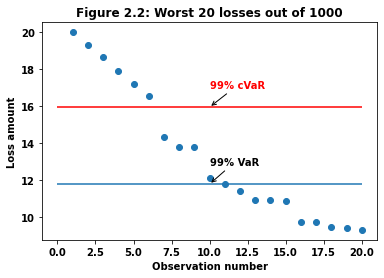

99% VaR is  11.781890699024686
99% cVaR is  15.949993320207135
99% interpolated VaR is  12.12450571944469
99% interpolated cVaR is  16.3625655225223


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as spst

#Generate some random numbers and show VaR and cVaR

#Generate 90% low vol, 10% high vol random numbers; this creates a fat-tailed distribution
trials=1000
rng = np.random.default_rng(314159)   #Use seed so repeatable
y=np.concatenate((rng.normal(0.,1.,int(.9*trials)), \
                  rng.normal(0.,10.,int(.1*trials))))
y.sort()  #Put them in order

p=.99
p100=p*100.
p_string="%0.0f"% p100

# Compute sample p-VaR; n=trials
# We assume there is probability mass = 1/(n+1) at each of the n observations.
# So the smallest observation has cumulative probability mass 1/(n+1) and
# the largest observation has cumulative probability mass n/(n+1)
# From (2.4) we want the smallest k such that
# k/(n+1) >= 1-p, i.e. k>=(n+1)(1-p)

breakpoint=(trials+1)*(1-p)
k=int(breakpoint)
#Python list convention is: first list element is index 0
#So if breakpoint is an integer, decrement k
#Otherwise leave it alone to get the next one up
if k==breakpoint:
    k-=1
VaRp=-y[k]

#Compute cVaR
#Standardization factor is (sum of probabilities <= VaRp). Here that's (k+1)/(n+1).
#As n->infinity that will get closer and closer to 1-p, but for the finite case
#it's a little off.
cVaRp=-np.sum(y[:k+1])/(k+1)

plt.scatter(range(1,21),-y[:20])
plt.annotate(p_string+"% VaR", xy=(10.0, VaRp), xytext=(10.0, VaRp+1),
            arrowprops=dict(arrowstyle='->',
                    facecolor='black'))
plt.hlines(VaRp,0,20)

plt.annotate(p_string+"% cVaR", xy=(10.0, cVaRp), xytext=(10.0, cVaRp+1),
            color='red', arrowprops=dict(arrowstyle='->',
                    facecolor='red'))
plt.hlines(cVaRp,0,20,colors='red')

plt.title('Figure 2.2: Worst 20 losses out of '+str(trials))
plt.xlabel('Observation number')
plt.ylabel('Loss amount')
plt.show();

pv_string=p_string+"% VaR is "
print(pv_string,VaRp)
pcv_string=p_string+"% cVaR is "
print(pcv_string,cVaRp)

#For comparison, generate VaR and cVaR with interpolation
#numpy percentile function does the wrong thing - assumes first observation
#is 0 percentile and last is 100th. Cure that by adding extra observations
#at each end.
z=np.insert(y,0,y[0]-1)
z=np.append(z,z[-1]+1)
VaRp_interp=-np.percentile(z,(1-p)*100)
# Compute sample p-cVaR without interpolation
nexceed=max(np.where(y<=-VaRp_interp)[0])
#-VaRp is (1-p) of the way between y[nexceed] and y[nexceed+1]
cVaRp_interp=-(np.sum([yy for yy in y if yy<=-VaRp_interp])-(1-p)*VaRp_interp)/ \
    (nexceed+2-p)
pv_string=p_string+"% interpolated VaR is "
print(pv_string,VaRp_interp)
pcv_string=p_string+"% interpolated cVaR is "
print(pcv_string,cVaRp_interp)

There are small differences between the VaR/cVaR defined above, and VaR/cVaR obtained from straight-line interpolating between probability masses.

Comparing the sample statistics with the formula values under the (counterfactual) assumption of normality results in the following:

In [3]:
#Get mean and standard deviation of the data
samp_mean=np.mean(y)
samp_std=np.std(y)

#Show normal VaR vs sample VaR
nVaRp=-(samp_mean+samp_std*spst.norm.ppf(1-p))
pv_string=p_string+"% Sample VaR is "
print(pv_string,VaRp)
pvn_string=p_string+"% Normal VaR is "
print(pvn_string,nVaRp)

# Get normal cVaR
ncVaRp=-samp_mean+samp_std*np.exp(-.5*(nVaRp/samp_std)**2)/((1-p)*np.sqrt(2*np.pi))
pcv_string=p_string+"% Sample cVaR is "
print(pcv_string,cVaRp)
pncv_string=p_string+"% Normal cVaR is "
print(pncv_string,ncVaRp)

99% Sample VaR is  11.781890699024686
99% Normal VaR is  7.5958778057456735
99% Sample cVaR is  15.949993320207135
99% Normal cVaR is  8.43350174708078


The random sample has worse empirical VaR and much worse cVaR than a normal distribution. We will see in Chapter 7 that this is not unusual.

### 2.3.2 Risk-Adjusted Reward Measures ###

Chapter 1's Nervous Lover would, in our scenario, only achieve a good result by taking a risk. Similarly Chapter 1's Hyperproductive Farmer took a risk by starting a cattle ranch. A natural question for each to ask is: is it worth it to take the risk?

We emphatically disavow the idea that there are metrics that might apply to the Nervous Lover. But we've just seen a number of risk metrics that do apply to financial situations. A natural answer to the question "is it worth it?" is to look at the ratio of reward gained to risk taken. This can be done in retrospect using historical data, or forward-looking if there is a model of future outcomes.

<a><a name="sharpe_ratio"></a>
One of the most widely used ratios is the [**`Sharpe Ratio`**](https://doi.org/10.3905%2Fjpm.1994.409501), named after [William Sharpe](https://www.nobelprize.org/prizes/economic-sciences/1990/sharpe/biographical), one of the co-winners of the 1990 Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel. Sharpe is currently an emeritus professor of finance at the Graduate School of Business, [Stanford University](https://web.stanford.edu/~wfsharpe/)

Sharpe Ratios are used both as backward-looking empirical measures, and forward-looking expectation measures. As a backward-looking measure, the Sharpe Ratio is
$$SR_{a}(x)=\frac{AvgRet(x)-RF_{a}}{StdDev(x-RF)}\label{eq:sharpe_empirical_arith}\tag{2.12}$$
Here $AvgRet(x)$ is the average period-by-period rate of return of an investment $x$ and $StdDev(x)$ is its standard deviation over the same periodicity. $RF_{a}$ is the average per-period risk-free rate &mdash; e.g. the interest rate on a completely safe bank account. We'll discuss the risk-free rate in more detail in the next section. The standard deviation calculation is actually the standard deviation of excess returns, i.e. period-by-period differences between the investment's return and the risk-free rate.

Most Sharpe Ratios are quoted in annual periodicity by multiplying by the square root of the number of periods per year; e.g. a Sharpe Ratio using monthly data is multiplied by $\sqrt{12}$.

In practice \eqref{eq:sharpe_empirical_arith} is often replaced with a variant:
$$SR_{g}(x)=\frac{GeomRet(x)-RF_{g}}{StdDev(x)}\label{eq:sharpe_empirical_geom}\tag{2.13}$$
Here $GeomRet(x)$ is the periodic geometric (compound) return of the investment and $RF_{g}$ is the periodic geometric (compound) return of a risk-free instrument. Thus a two-period investment $x$ having returns $+5\%$ in the first period and $-5\%$ in the second period would have $AvgRet(x)=0$ and $GeomRet(x)=\sqrt{1.05*.95}-1=-12.51$bps. Geometric mean return is always less than (or equal to, if there is no variance) arithmetic mean return, so $SR_g(x)\leq SR_a(x)$. $SR_g(X)$ is not the authoritative (i.e. Sharpe's) definition of the Sharpe Ratio, but the reader should be aware that less rigorous calculations might use it rather than $SR_a(x)$, thereby biasing the ratio downward.

Another frequent departure from Sharpe's definition is a failure to use the standard deviation of excess (over risk-free) returns in the denominator. Some calculations simply take the standard deviation of returns without subtracting the risk-free rate. Usually the variability of the risk-free rate is quite small compared to the variability of the investment. A failure to remove the risk-free rate will probably bias standard deviation upward and hence bias the Sharpe Ratio downward.

Both $SR_{a}$ or $SR_{g}$ can be converted to forward-looking measures if investment $x$'s returns have an associated probability distribution from which expectations of the relevant quantities can be computed. 

The **`Treynor Ratio`** is named for [Jack Treynor](https://www.q-group.org/jack-treynor-prize/), one of the founders of quantitative investment management. It has the same numerator as the Sharpe Ratio, but the risk measure in the denominator is $Cov(x-RF,m-RF)/Var(m-RF)$ where $m$ is the overall market in which the investments are being made. For example $m$ might be the [Standard \& Poor's 500 Index](https://us.spindices.com/indices/equity/sp-500) if the relevant market is the US stock market. Here $Cov$ means covariance, either empirically from historical performance data, or modeled from forward-looking expectations. ("Var" as usual means variance.) We will see in Chapter 6 that this denominator, popularly called "beta," is an important measure of market risk.
    
**`Jensen's Alpha`** is due to [Michael Jensen](https://www.hbs.edu/faculty/Pages/profile.aspx?facId=6484), currently an emeritus professor at Harvard Business School. In a [1967 paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=244153), Jensen noted
>The problem of portfolio "performance" has at least two distinct dimensions:
>1. The ability of the portfolio manager or security analyst to increase returns on the portfolio through successful prediction of future security prices; and
>2. The ability of the portfolio manager to minimize (through "efficient" diversification) the amount of "insurable risk" born [sic] by the holders of the portfolio.

Jensen assumed that his item 2 was risk arising from exposure to the market from which the portfolio was chosen. His model is
$$x-RF=\alpha+\beta(m-RF)+\epsilon$$
Here $x$ represents an investment portfolio; $RF$ the risk-free rate; and $m$ the market from which the portfolio $x$ is selected. When this approach is used as a backward-looking performance measure over $T$ time periods, the inputs $x$, $RF$, and $m$ are $T$-vectors of rates of return and $\alpha$ and $\beta$ are the scalars that minimize $\epsilon^{\intercal}\epsilon$; that is, $\alpha$ and $\beta$ are regression coefficients. The $\beta$ here gives the exposure to market risk and is similar to the denominator in the Treynor Ratio. The outperformance &mdash; item 1 in Jensen's list above &mdash; is given by $\alpha$.
    
The **`Modigliani and Modigliani`** (or $M^2$) measure was developed by the late [Franco Modigliani](https://www.nobelprize.org/prizes/economic-sciences/1985/modigliani/biographical) and his granddaughter Leah Modigliani. Franco Modigliani won the 1985 Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel. Leah Modigliani is a [market strategist](https://www.alumni.hbs.edu/stories/Pages/story-bulletin.aspx?num=5207). Their measure can be defined as
$$M^2(x,b)=SR_a(x)\cdot StdDev(b)+RF\label{eq_msquared}\tag{2.14}$$
Here $b$ is a benchmark investment: it may be the same as the $m$ (market) of the previous paragraph, or may be more a more specific benchmark like an index of small growth-oriented companies. $StdDev(b)$ is the standard deviation of $b$'s excess returns over the risk-free investment's returns. Another way to write the $M^2$ measure is
$$M^2(x,b)=AvgRet(x)\frac{StdDev(b)}{StdDev(x)}+RF\bigl(1-\frac{StdDev(b)}{StdDev(x)}\bigr)$$
The more volatile $x$ is, the less weight is placed on its return and the more weight is placed on the risk-free instrument. The idea is that good returns that may be in $AvgRet(x)$ need to be penalized if they were obtained by taking undue risk. On the other hand, if $x$ takes less risk than its benchmark, the returns it achieved get scaled up. Thus higher-than-benchmark risk is penalized and lower-than-benchmark risk is rewarded.
    
The **`Sortino Ratio`**, due to [Frank Sortino](https://doi.org/10.3905/joi.3.3.59), does not use risk-free rates or benchmarks as points of comparison. Instead, it assumes that the investor has a target rate $T$ that s/he wants to attain; Sortino calls this the "minimal acceptable return." The ratio is
$$Srt(x,T)=\frac{AvgRet(x)-T}{\sqrt{\frac{1}{F(T)}\int_{-\infty}^T(T-r)^2f(r)dr}}\label{eq:sortino}\tag{2.15}$$
Here $f(r)$ is the probability density function (either empirical or modeled) for the investment's returns. The denominator of \eqref{eq:sortino} is therefore the same as downside semi-standard deviation \eqref{eq:downside_semi}, but with a cutoff at $T$ rather than at the mean $\mu$.
    
The **`Omega Ratio`** is due to [Con Keating and William Shadwick](https://pdfs.semanticscholar.org/a63b/0a002c6cf2d4085f7ad80cbfd92fe3520521.pdf); they originally called it "gamma" rather than "omega." Like Sortino, they contemplate a target rate T and integrate over a distribution:
$$\Omega(x,T)=\frac{\int_{T}^{\infty}(1-F(r))dr}{\int_{-\infty}^T F(r)dr}\label{eq:omega_ratio}\tag{2.16}$$
Here $F(r)$ is the cumulative distribution function of asset $x$'s returns.
    
Using integration by parts, the denominator in \eqref{eq:omega_ratio} can be rewritten
$$\int_{-\infty}^T F(r)dr=TF(T)-\mathbb{E}[x\delta(x\leq T)]$$
Here the $\delta$ function is one if its argument is true and 0 otherwise.
The numerator can be rewritten
$$\int_{T}^{\infty}(1-F(r))dr=-T(1-F(T))+\mathbb{E}[x\delta(x\geq T)]
=TF(T)-T+\mathbb{E}[x]-\mathbb{E}[x\delta(x\leq T)]$$
Note
$$TF(T)-\mathbb{E}[x\delta(x\leq T)=\mathbb{E}[(T-x)^+]$$
where the $^+$ operator returns the argument ($T-x$) if the argument is positive and returns zero otherwise. So we can rewrite \eqref{eq:omega_ratio} as
$$\Omega(x,T)=\frac{\mathbb{E}[x]-T}{\mathbb{E}[(T-x)^+]}+1$$
From this we can see that the Omega Ratio rewards (in the numerator) expected returns over the target $T$, and penalizes (in the denominator) the expectation of the shortfall in returns under the target.

## 2.4 Coherent Risk ##
<a name="coherent_risk"></a>

In the late 1990s, four co-authors [Artzner, Delbaen, Eber and Heath ("ADEH")](https://people.math.ethz.ch/~delbaen/ftp/preprints/CoherentMF.pdf) postulated a series of mathematical axioms that, they claimed, any reasonable ("coherent") measure of financial risk should have. They were trying to avoid damaging situations like the trader's option strategy described in the previous section.

ADEH's definition of risk is more accounting-oriented than the essentially probabilistic Knight definitions. For ADEH, risk is how much cash has to be put into a portfolio to make it acceptable. An "acceptable" portfolio is one that passes regulatory or other hurdles. So to ADEH, risk is a peril &mdash; the chance of having an unacceptable portfolio &mdash; and the metric for risk is the size of the monetary fortification you need to build to protect yourself from the peril.

For example if your portfolio contains the previous section's options trading strategy, losing a billion dollars would probably be unacceptable. Maybe "acceptable" means never having less than $\$100,000,000$. If you added $\$1,100,000,000$ in cash to that portfolio, you'd eliminate the possibility of ending up below the threshold, making the portfolio (or at least that part of the portfolio) acceptable. The ADEH-type risk of the portfolio might then be $\$1.1$ billion.

More formally, ADEH defined a **`risk measure`** as a mapping from a random variable $X$ to the real numbers. $X$ could be an amount of money; a change in an amount of money; or a rate of return. The sample space $\Omega$ (which ADEH assume is finite) encompasses all relevant economic conditions one period forward.

<a name="risk_free_instrument"></a>ADEH assumed there is a single risk-free instrument $R_f$, sometimes called a **`money market account`** or just **`cash`**. $R_f$ is an investment that will always be worth one unit of currency one period in the future, no matter what state the world is in at that time. In practice $R_f$ is a loan to a completely reliable institution like a very solid government or bank. We'll learn more about the time value of money in Chapter 3, but for now note that money in the future is not the same as money now, so $R_f$ is not necessarily worth one unit of currency now. If the completely reliable institution is paying a rate of interest $r_f$ per period, $R_f$ will be worth $\frac{1}{1+r_f}$ now.

ADEH put forward four axioms that sensible risk measures $\rho$ must satisfy.
- Axiom T (**Translation Invariance**):
$\rho(X+\alpha R_f)=\rho(X)-\alpha$. This says we can decrease our risk by adding cash to our portfolio. ADEH point out that this means $\rho(X+\rho(X)R_f)=0$, i.e. $\rho(X)$ is the amount of cash that will eliminate risk.
- Axiom S (**Subadditivity**):
$\rho(X+Y)\leq\rho(X)+\rho(Y)$. This says diversification helps, or at least doesn't hurt, to reduce risk. ADEH note that if this were not true, entities (trading desks, banks, companies, portfolios) would be encouraged to split up into pieces to give the appearance of having less risk. 
- Axiom PH (**Positive Homogeneity**):
If $\lambda\geq0$, then $\rho(\lambda X)=\lambda\rho(X)$. We know from Axiom S that $\rho(nX)\leq n\rho(X)$. This says that equality holds, and fills in between the integers. In effect this ignores liquidity risk,[$^7$](#two_footnotes) which ADEH acknowledge; they are focused on whether an amount of money is sufficient or not.
- Axiom M (**Monotonicity**): 
If $X\leq Y$, then $\rho(Y)\leq \rho(X)$. Here $X\leq Y$ means that the random variable $Y$ stochastically[$^8$](#two_footnotes) dominates the [random variable](#basic_probability_terminology) $X$. So this axiom says that having more money is less risky than having less money.

A risk measure satisfying these four axioms is called **`coherent`**.

To see whether you've understood coherent risk, see if you can resolve the following puzzle:
>Suppose $X$ is a random variable that gives us more money than we have now under any circumstances; say $X(0)=0$ where 0 is the current time, and $X(1)=2$ or $X(1)=4$ with equal probability at time 1 in the future. Let $Y=2X$. Axiom PH says $\rho(Y)=2\rho(X)$. But Axiom M says $\rho(Y)\leq \rho(X)$. How can both statements be true?

The axioms of subadditivity and positive homogeneity are sometimes replaced by a single, weaker axiom:
- Axiom C (**Convexity**)
If $1\geq \lambda\geq 0$, then $\rho(\lambda X+(1-\lambda)Y)\leq\lambda\rho(X)+(1-\lambda)\rho(Y)$.

A risk measure satisfying translation invariance, convexity, and monotonicity is called a **`convex risk measure`**.

We've already seen an unfortunate failing of the VaR measure: it fails to detect rare but disastrous events that are below the probability threshold. But ADEH give another example that shows that VaR isn't convex, so it certainly isn't coherent.

Suppose there are two digital options on a stock. The first one, A, costs h at time 0 and pays $1000$ at time $1$ if the value of the stock is over some H, and $0$ otherwise. The second digital option, B, costs l (lower case L) at time $0$ and pays $1000$ at time $1$ if the value of the stock is under some L, and $0$ otherwise. Here $L<H$.

The payoff profile of buying both A and B: you get $1000$ if the stock ends up under L or over H, and nothing in between. Suppose we choose L and H so that $Pr(Stock<L)=Pr(Stock>H)=80bps$. A is a lottery ticket that pays off $1000$ with probability $80$bps, and zero the rest of the time. Its expected value is $8$, and any risk-averse utility function is going to value it less than $8$. Even a risk-loving but reasonable utility function will value it closer to $8$ than to $1000$. Similarly for option B.

Assume without loss of generality that the risk-free instrument $R_f$ is worth $1$ today (i.e. the risk-free rate is $0$). Then there is no time value of money to worry about and the $99\%$ money VaR of writing (going short) $2$ A's is $-2h$, because $99.2\%$ of the time the option does not pay off and you pocket $2h$ from writing the options. Having positive money is negative value at risk. Similarly the $99\%$ money VaR of writing 2 B's is $-2l$.

However, suppose you write one A and one B. The middle ground between L and H &mdash; the place where neither pays off &mdash; has $100\%-.8\%-.8\%=98.4\%$ probability. There is a $1.6\%$ chance the stock will end up either very low (less than L, where B pays off) or very high (greater than H, where A pays off). The $99\%$ money VaR of writing one A and one B is 1000-l-h, a (large) positive=bad number.

So this is another example of VaR not seeing concentrated risk. One A and one B is a better-diversified portfolio than two A's. In effect the VaR measure encourages its users to double up on their low-probability bets (or triple up or quadruple up...). 

You can't hide problems in the tail with expected shortfall/cVaR/spectral risk measures – they get averaged in. ES/cVaR/SRM do the right thing in the digital options example. [Acerbi 2002](http://dx.doi.org/10.1016/S0378-4266(02)00281-9)) showed that spectral risk measures are coherent, so expected shortfall (and therefore cVaR when there is a differentiable cdf F) are also coherent. In January 2011 (about 13 years after ADEH), the [Basel Committee on Banking Supervision](http://www.bis.org/publ/bcbs_wp19.pdf) noted
>VaR has become a standard risk measure in finance. Notwithstanding its widespread use, it has been criticised in the literature for lacking subadditivity... The most popular alternative to VaR is expected shortfall, which is subadditive. It is slowly gaining popularity among financial risk managers.

In fact at this writing, most financial institutions still report only VaR to shareholders and regulators. When ES is used, it is often used internally.

## 2.5 Risk-Averse Prices ##

Most people are risk-averse and won't pay expected or average value for risky propositions. This was most apparent with the St. Petersburg lottery (section 1.4.1) whose expected value was infinite in its pure form, or perhaps around $\$48$ when taking into account the finite wealth of the world. Bidding for this lottery usually centers around $\$4$, consistent with a risk-averse logarithmic utility function.

This risk aversion carries over into securities markets. We don't have to fantasize about meeting [Generous Billionaires](#generous_billionaires): a little more realistically, we can suppose there is a company with a similar payoff pattern.

Assume that _Beyond Vegetables_ is a startup company developing a potential blockbuster process to change beef into kale. _Beyond Vegetables_ will be worth $\$1$ billion one year from now if its testing phase is successful, and nothing if not. Suppose further that analysts agree that there is a probability $p$ that testing will succeed and a probability $1-p$ that it won't.

_Beyond Vegetables_ issues 1 billion shares, i.e. each share represents ownership of one one-billionth of the company. For people with risk-neutral utility functions, a share is worth $p$ now (assuming for now there is no time value of money). But we know that investors don't have risk-neutral utility functions: they are generally risk-averse.

For example someone whose current wealth is $w$ and who has a logarithmic utility function might be considering an investment of a fraction $f$ of his total wealth in _Beyond Vegetables_. The security will be worth $\$1$ per share if it's successful. If it's currently valued at $q$ per share, then its payoff factor on success is $1/q$ per share. The point of indifference between investing in this security and doing nothing is
$$p\cdot ln(w(1-f+f/q))+(1-p)\cdot ln(w(1-f))=ln(w)\tag{2.15}$$
That gives
$$q=\frac{f}{(1-f)^{1-1/p}-(1-f)}\label{eq:log_normal_q}\tag{2.16}$$
Applying L'H&ocirc;pital's Rule to \eqref{eq:log_normal_q} shows that when $f=0$, the investor is willing to pay $q=p$ per share; i.e. the price based on the security's expected value. In other words, if the investment is negligible to the investor, she is risk-neutral. But as $f\to1$, the risk of the investment becomes more and more of a concern so the price $q$ the investor is willing to pay approaches zero; that is, the payoff factor $1/q$ required to convince the investor to take the risk approaches infinity.

The code in the next cell generates isoprobability lines where each line shows the indifference price per share $q$ for a fixed $p$ at differing fractions of wealth $f$.

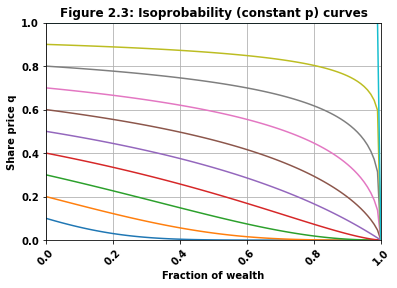

In [4]:
def SharePrice(f,p):
    #Price to pay when a fraction f of
    #wealth is invested in a gamble that pays 1 with probability
    #p and 0 otherwise, log-utility
    #See formula 2.16 above
    if (f<0) or (f>=1) or (p<=0) or (p>1): #Can't bet anything
        return(0.0)
    if (f==0.0):              #Limiting amount to be risk-neutral
        return(p)
    if (p==1.0):
        return(1.0)
    one_minus_f=1-f
    denom=one_minus_f**(1-1/p)-one_minus_f
    return(f/denom)
#Done with SharePrice

#Generate isoprobability graphs

frac_wealth = np.arange(0,1.01,.01) #compute at fractions of wealth
                                    #ranging from 0 to 1 by .01's
prob = np.arange(.1,1.1,.1) #Compute isoprobability curves every 10%
                            #of probability
#y is a list of lists - each contained list is an isoprobability curve
y=[[SharePrice(fw,pr) for fw in frac_wealth] for pr in prob]

#Display the graph
for i in range(len(prob)):    #Do each isoprobability line
    plt.plot(frac_wealth,y[i])

plt.xticks(rotation=45)
plt.grid()
plt.title('Figure 2.3: Isoprobability (constant p) curves')
plt.xlabel('Fraction of wealth')
plt.ylabel('Share price q')
plt.axis([0,1,0,1])
plt.show();

The maximum share price on each isoprobability curve in Figure 2.3 is $p$, the probability of success. But the price $q$ that investors are willing to pay drops as the fraction of wealth at risk gets higher and higher, because investors demand a premium to take the risk. Eventually with log-utility they just won't pay anything.

Different potential investors will have different levels of starting wealth, so their places on the X-axis of Figure 2.3 will vary. In practice no one has definitive knowledge of the probability of success $p$, so different investors will have different ideas about where to be on the Y-axis of Figure 2.3. Some or all potential investors may not even have log-utility functions. In fact they may [not even act as if they have utility functions](#utility_drawbacks). There is some evidence that certain kinds of securities even elicit risk-loving rather than risk-averse preferences.

All these complications are rather discouraging. Nonetheless, securities do manage to trade. Market participants come to a price they would be willing to pay (if they are potential buyers) or receive (if they are potential sellers) based on their combined thoughts about probability of success and risk preference. If the highest-price buyer has a price that is above or equal to the lowest-price seller, then a transaction will take place at a **`market-clearing price q`** that matches up overlapping buyers and sellers. These buyers and sellers are cleared from the market since their wishes are fulfilled.

## 2.6 No-Arbitrage ##
<a name="no_arbitrage"></a>

Let's use "W" (for "win") to denote a share of _Beyond Vegetables_; W's price is $q$. And suppose that there exists a complementary security "L" (for "lose") that pays \\$1 if the beef-to-kale transmogrification process fails, and \\$0 if it succeeds. A portfolio consisting of one W and one L will be worth \\$1 one year from now no matter what happens.

While W alone or L alone are risky securities &mdash; we don't know at the present time whether they will pay off or not &mdash; the combination W+L is risk-free. We know exactly what will happen to W+L in the future: no matter which outcome is realized, W+L will be worth \\$1. That's the same as the [risk-free instrument](#risk_free_instrument) $R_f$. If the value of $W+L$ today is less than the value of $R_f$ today, then we would buy $W+L$ and sell $R_f$ (the equivalent of borrowing money). That would net a positive amount $W+L-R_f$ today and always be worth nothing in the future, so we would be able to pocket free money by doing this. If the value of $W+L$ today is greater that the value of $R_f$ today, we'd reverse signs on the transaction and pocket free money.

A fundamental principle in markets is that there shouldn't be opportunities to make free money. If an investor can take on a position that costs nothing, and its value in at least one future state of the world is strictly positive while its value in no future state of the world is negative (i.e. the investor never owes money), then that's free money. Or equivalently, if taking on a position has a strictly negative cost (i.e. taking on the position gives money to the investor in the present time) while in all future states of the world the position's value is non-negative, then that's free money.

Such a free money position is called a **`(risk-free) arbitrage`**, and the assumed lack of such opportunities is called **`no-arbitrage`**. There can actually be risk in a risk-free arbitrage; there can be uncertainty about exactly how much free money the arbitrage will produce. A risk-free arbitrage is actually a **`peril-free arbitrage`**; there is no danger of losing money. But the "risk-free" label is universally used.

<a name="law_of_one_price"></a>A slightly narrower version of the no-arbitrage idea is the **`Law of One Price,`** which says that the same item can't have two different prices in two different markets at the same time. If it did, an arbitrageur could buy the item where it is cheaper and sell it where it is dearer, creating a riskless arbitrage.

### 2.6.1 Limits of Arbitrage ###

However, in practice arbitrages can and do exist. A particularly shocking example occurred on April 20, 2020 when the price of oil went [negative to as low as $-\$40.32$ per barrel](https://www.eia.gov/petroleum/weekly/archive/2020/200422/includes/analysis_print.php). The oil market was already disrupted due to lingering effects of a Russian-Saudi oil price war; lack of demand due to the COVID-19 economic slowdown; and lack of storage facilities.

These fundamental oil market drivers interacted badly with the technicalities of financial contracts to cause negative financial market prices, with [contemporaneous analysis suggesting](https://www.eia.gov/petroleum/weekly/archive/2020/200422/includes/analysis_print.php)
>...that the phenomenon of negative [oil] prices could be confined to the financial market, with few physical market participants paying negative prices. The positive pricing of other crude oil benchmarks...  suggest that the recent [negative] price action was predominantly driven by the timing of the May 2020 contract expiration.

Vigilant investors will quickly see such anomalies and take advantage of them: the price of oil did return to a positive number within a day. The very act of taking advantage of arbitrages will eventually make them disappear, since the arbitrageur will exert pressure on prices in the right direction by buying too-cheap assets and selling too-expensive assets.

It is also possible for less sensational arbitrages to exist over longer time periods. Most obviously, there may be costs or other annoyances involved in taking advantage of the arbitrage. For example, in theory it appears that the price of $.995$ fine gold in New York should be the same as $.995$ fine gold in London. If the price of gold in New York is less than the price of gold in London, then the Law of One Price implies that an arbitrageur could buy gold in New York and sell it in London.

But as a practical matter gold dealers would charge a commission for the buy in New York and the sale in London, and it would cost something to transport the gold from New York to London. Further, the transportation would take a little time during which the price could change, so the arbitrage wouldn't be riskless. There might be taxes in one or both locations. There might be regulatory restrictions on importing or exporting gold. There might be costs to store the gold in a secure warehoues during the pendancy of the transaction. (Indeed, extreme storage costs were a large factor in the negative price of oil on April 20, 2020.)

There might be **`counterparty risk`**: the arbitrageur pays the New York dealer to deliver gold, but the dealer then goes bankrupt and fails to deliver the gold. Similarly, the arbitrageur might deliver the gold to the London dealer but the dealer then goes bankrupt and fails to pay. Even if the arbitrageur manages to retain or get back its money or gold when the dealer fails, there's still a problem (called **`execution risk`**) because the transactions no longer offset each other. For example based on the assumption that it had obtained gold from the now-failed New York dealer, the arbitrageur may have entered into an obligation to deliver gold to the London dealer. In that case the arbitrageur would have to obtain the gold very quickly somewhere else, possibly at a much higher price.

More subtly, taking advantage of an arbitrage requires the temporary use of money that can be needed elsewhere, especially during market disruptions when arbitrages are most apparent. Therefore using money has a cost, known as the **`cost of capital`**.

The various impediments to pure theoretical arbitrage are collectively known as [Limits of Arbitrage](https://dx.doi.org/10.2307/2329555).

### 2.6.2 Short Sales and Short Squeezes ###

Section 2.6 above claimed that "If the value of $W+L$ today is greater that the value of $R_f$ today, we'd reverse signs on the transaction and pocket free money." This statement assumed that negative positions in the $W$ and $L$ securities could be easily established. A negative position in an asset is called a **`short`**, and of course a positive position is called a **`long`**.

Most theoretical work assumes that a short position can be taken simply by deploying the minus key on a keyboard. In practice, however, the process of establishing and maintaining short positions (called **`short selling`**) has many peculiarities that make it more problematic than establishing positive positions. We'll explore these features as a cautionary tale about the gap between the theory and the practice of arbitrage.

In practice, an investor establishes a short position in a security by borrowing it. (If there are derivatives markets in the security, there may be other ways to establish short positions; for now we'll just focus on short selling of primary securities.)

To establish a negative position in $W$ (the stock of _Beyond Vegetables_), an investor must find (through a broker) someone who owns $W$ and who is willing to lend it. The borrowing investor agrees to give back a share of $W$ to the lending owner whenever the owner demands. The shares of a company are divided into a small number of classes whose members are indistinguishable from each other (i.e. they are fungible), so the investor doesn't have to earmark the particular share that was borrowed to be given back to the lending owner. Any share of the same class will suffice for repayment.

After obtaining a borrowed $W$, the investor sells it on the open market for cash. Let's suppose the investor gets $\$0.50$ when $W$ is sold. After the sale, the investor has created a short position in _Beyond Vegetables_ because a share is owed to the owner. The investor also has $\$0.50$ in cash.

The short seller has applied negative pressure (through the sale of $W$) on _Beyond Vegetables'_ stock price, causing the price to reflect a slightly more negative view of _Beyond Vegetables'_ future prospects than before the short sale. Of course, pessimistic views could also be reflected in the price simply because buyers avoid the stock. But short sellers can speed up the rate at which negative sentiment is impounded into prices.

This function has long been derided at length by long investors, especially company insiders who naturally would prefer to avoid negative sentiments affecting their stock prices. For example, Elon Musk, the founder of Tesla, tweeted
>u can’t sell houses u don’t own, u can’t sell cars u don’t own, but u *can* sell stock u don’t own!? this is bs – shorting is a scam legal only for vestigial reasons.[$^9$](#two_footnotes)

Mr. Musk is engaged here in a practice at least as old as short selling called "talking one's book," i.e. trying to convince other investors to take one's position, thereby enhancing its value. In this case Mr. Musk was trying to prevent other investors from taking an opposite position.  

But, properly used, short selling can improve price discovery and market efficiency. Since the idea of turning beef into kale is in fact idiotically inefficient absent a fundamental change in energy conservation laws, the activity of a short seller in _Beyond Vegetables_ moves prices in the right direction. Further, short selling can help eliminate inconsistencies between markets.

Thus, when the rest of the world realizes that turning beef into kale is uneconomical and _Beyond Vegetables_ fails, the short-selling investor will benefit. When the price falls, the investor can buy a share of $W$ on the open market for close to zero. That share of $W$ is then given back to the original owner, extinguishing the investor's short position. The short seller's net profit in this case is close to $\$0.50$, minus some costs we'll note below.

While buying a positive asset like $W$ produces a positively skewed distribution, selling it short produces a negatively skewed distribution. Suppose that _Beyond Vegetables'_ researchers stumble across a heretofore undiscovered quantum tunneling effect that makes the idea of turning beef into kale fabulously more profitable than anyone expected, and the price of _Beyond Vegetables_ skyrockets to $\$10$ a share. The short-selling investor is now looking at a big loss: after closing out the short position by buying back a share, the investor has lost $\$9.50$ on an position that had a maximum gain of $\$0.50$.

During the time the short investor owes the share to the original owner, the investor must pay borrowing fees to the owner and to the broker. If the stock pays dividends, the short seller must pay the dividend amounts to the owner. Typically short sale arrangements are terminated on the initiative of the short seller, but in fact the owner can demand the stock back on very short notice at any time. For example, if the owner decides to sell the stock, a demand will be made for return of the borrowed shares.

In addition, the broker arranging the short sale will not wait until the owed share is worth $\$10$ to check whether or not the short-selling investor has enough money to buy it back. Short sellers must maintain **`margin`** (a cash account that the broker can sieze) of (typically) $150\%$. So in our example when the investor first borrows the stock and sells it for $\$0.50$, the investor must leave the $\$0.50$ proceeds in the margin account and deposit another $\$0.25$ in cash. As the price moves, the broker will demand that the investor adjusts the margin position (a **`margin call`**). If the investor can't come up with newly required margin cash, the broker may use the existing margin cash to buy back the owed stock, closing out the position.

Engleberg, Reed and Ringgenberg[$^{10}$](#two_footnotes) summed this up by saying
>Short selling is a risky business. Short sellers must identify mispriced securities, borrow shares in the equity lending market, post collateral, and pay a loan fee each day until the position closes. In addition to the standrd risks that many traders face, such as margin calls and regulatory changes, short sellers also face the risk of loan recalls and the risk of changing loan fees.

Thus it's clear that short selling has annoyances (borrowing fees, dividends, margin maintenance, the usual transactions costs of buying and selling shares) that make the practice more frictive than the theory.

Engleberg, Reed and Ringgenberg[$^{10}$](#two_footnotes) further identified dynamic risks associated with short selling. They noted that some stocks have greater uncertainty about future loan fees and availability than others. An increase in loan fees and a decrease in shares that can be borrowed can be a problem for short sellers, creating a noticeable short-selling risk premium (i.e. lower future returns due to lack of appropriate short selling).

A particular form of short-selling risk that can elevate the drawbacks of short selling from annoying to catastrophic is a **`short squeeze`**. Short squeezing is the practice of deliberately driving up share prices, typically when there is a large aggregate short position in the stock, in order to force short sellers to buy back the shares they owe at disadvantageous prices. The initial higher stock price in a squeeze forces some short sellers to close out their positions to avoid further losses; other short sellers may not be able to meet their margin calls and may have their short positions forcibly closed out by their brokers. Further upward pressure on stock prices is then provided by the short sellers buying back shares, leading (the squeezer hopes) to a strong upward spike in prices.

Historical examples of short squeezes are not themselves in short supply. An example:[$^{11}$](#two_footnotes)
>Allan Ryan, known in the early twentieth century as a speculator good at the art of squeezing short sellers, had bought a controlling interest in the Stutz Motor Company of America, Inc. At the beginning of 1920, its price had risen steadily from $\$100$ to $\$134$. Ryan was told that short sellers had taken action thinking that the price had risen too high. Among the short sellers were some prominent members of the stock exchange. To counter the bears, Ryan borrowed substantial amounts to buy additional shares. At ﬁrst, despite Ryan’s heavy purchase, the price went down, since the short-selling pressure was considerable. But then the price increased in late March, reaching $\$391$. Towards the end of March, short sellers were selling stock that had to be borrowed from Ryan, since he had almost all floating shares.

Trading in Stutz Motor was eventually suspended due to irregular price movements. A market-clearing price of $\$550$ was agreed by mediation.

A more recent example of a short squeeze was the stock of Gamestop, Inc. (symbol GME). While the information technologies in the Stutz and Gamestop eras were very different, there are many similarities.

[Gamestop, Inc.](https://gamestop.gcs-web.com/home-page) is a retailer of video games. Much of Gamestop's business involves the sale of games and other items in physical format through bricks-and-mortar stores. While Gamestop does provide streaming platforms, it was in decline and lost money during 2020 due in part to the rise of streaming technology. Short sellers, reportedly mostly hedge funds, took notice and began massively shorting GME. During much of 2020[$^{12}$](#two_footnotes) GME shorts positions were around $100\%$ of the floating (publicly trading) shares; by late 2020 around $140\%$ of GME was shorted.[$^{13}$](#two_footnotes)

In 2020, the [Wall Street Bets](https://www.reddit.com/r/wallstreetbets/) subreddit began discussing GME and its heavy short positions. The group mobilized thousands of small investors to buy GME, hoping to squeeze the shorts. The ensuing market disruption was spectacular, as the price of GME lost all contact with the actual business prospects of Gamestop.

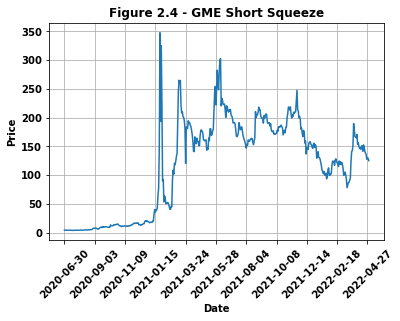

In [5]:
#Display GME short squeeze 2020-2021
import yfinance as yf
from datetime import datetime

tix = yf.Ticker("GME")
# get historical market data
hist = tix.history(period="max")

#Drop rows with any NaNs
hist = hist.dropna()

#Plot prices
start_date = datetime.strptime("2020-06-30", "%Y-%m-%d")
x=hist[hist.index>=start_date].index   #dates
y=hist[hist.index>=start_date].Close   #adjusted prices
i=np.arange(len(y))   #index
plt.plot(i,y)

#Display about 10 dates on the x axis
stride=int(len(y)/10)
plt.xticks(i[::stride],x[::stride].strftime("%Y-%m-%d"),rotation=45)

plt.title("Figure 2.4 - GME Short Squeeze")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show();

During the GME disruption, parts of the financial system became strained because GME prices, unmoored from the fundamental reality of Gamestop's business, fluctuated so wildly. As noted above, short selling is implemented via borrowing. At the same time, many buyers of GME bought on margin: that is, they borrowed cash to buy shares of GME. Thus big swings in any direction could expose lenders (of stock or of cash) to increasing chances of not getting repaid. Broker-dealers and clearinghouses scrambled to raise margin (cash collateral) from clients to buffer themselves against the possibility of defaults by those clients, and trading in GME was halted on some platforms.

A narrative often heard during short squeezes is that short sellers represent the Wall Street Establishment, while the squeezers represent feisty entrepreneurs and Main Street ordinary folks. Thus the reference to the shorts being "prominent members of the stock exchange" in the 1920 Stutz squeeze. Speaking in 2021 of the short squeeze on the supermarket chain Piggly Wiggly in 1923, Kenneth Pringle said:[$^{14}$](#two_footnotes)
>As with GameStop..., Piggly Wiggly was being sold short by several big Wall Street investment firms. This aroused an unexpected popular backlash, stirred by resentment of "city slickers" getting rich off the "yaps," or little guys. So there was a sense of triumph when investors fought back and put the squeeze on the shorts.
"New York investors," crowed one newspaper, "made to pay through the nose."

In fact the Piggly Wiggly short squeeze was orchestrated by Clarence Saunders, the multimillionaire founder and president of Piggly Wiggly. Mr. Saunders could be called the Elon Musk of his day: he invented the self-serve supermarket concept. Previously shoppers had waited while clerks retrieved items from shelves. Mr. Saunders also apparently shared Mr. Musk's feelings about short selling.

The populist narrative remains a useful part of the short squeezer's talking-the-book toolkit. In 2021 the Gamestop squeezers were cheered on by a shout-out from US Representative Ro Khanna, who prepended a modern technology garnish to the century-old short squeeze narrative:[$^{15}$](#two_footnotes)
>However, this entire [Gamestop] episode has demonstrated the power of technology to democratize access to American financial institutions, ultimately giving far more people a say in our economic structures. This also showed how the cards are stacked against the little guy in favor of billionaire Wall Street Traders.

It's important to recall that overall economic welfare is enchanced when a stock market is a forum for discovering prices that reflect the likely future prospects of the companies that trade in the market. That helps to direct resources to efficient projects and away from inefficient ones. Gamestop, along with other "meme stocks," now trades on crowd sentiment rather than on economic efficiency.

Gamestop was a loss-making enterprise during 2020 with dubious prospects for significant future profits just before the runup shown in Figure 2.4. Billions of dollars of capital that could have been directed to more productive enterprises changed hands due to GME trading. Despite a century of legal, regulatory, and technological advances, the stock market's price discovery function failed just as badly for GME in 2021 as it did for Stutz Motor Company of America in 1920.

### 2.6.3 No-Arbitrage Formulation ###

Market imperfections like short squeezes and negative oil prices can bankrupt the unwary. But it's hard to write down simple equations that anticipate the effects of subreddit discussions.[$^{16}$](#two_footnotes) The other limits to arbitrage &mdash; transactions costs, taxes, fees, regulations$\dots$ &mdash; are similarly hard to capture in simple formulas.

Thus most theoretical work assumes that no arbitrage opportunities are available. In most markets, this is approximately correct: the New York gold price might be a little different than the London gold price and it wouldn't be worth the cost of closing the gap. But if there's a big enough price difference someone will arbitrage it away, or at least down. For more dramatic departures from no-arbitrage like negative oil prices, the practitioner simply has to keep a sharp eye out.

A general mathematical formulation of the no-arbitrage principle is the following: For any linear combination $a_1x_1+…+a_nx_n$ of securities $x_1,...,x_n$ where the current price of the combination is zero, then either (a) the price of the combination must be zero in all future states of the world; or (b) there must be at least one future state with a strictly positive price and at least one future state with a strictly negative price.

## 2.7 State Prices and Risk-Neutral Probabilities ##
<a name="state_prices"></a>

Absent the discovery of a new quantum tunneling effect, the outcomes of _Beyond Vegetables_ were couched in starkly binary terms &mdash; either it succeeded fully and $W$ ($L$) was worth $\$1$ ($\$0$) a share or it failed fully and $W$ ($L$) was worth $\$0$ ($\$1$) a share. That means these securities are examples of what economists call **`state-price securities`** or **`Arrow-Debreu contingent claims`**. In financial markets, they are called **`binary (or digital) options`**, such as the ones used in ADEH's example of the problems with VaR regarding [coherent risk](#coherent_risk). Such securities are indicator variables: they pay $\$1$ contingent on the occurrence of some outcome (e.g. beef-to-kale success) and nothing if that outcome doesn't happen.

Let $q$ be the multiplier such that the price of the win security $W$ equals ${q}R_f$ today, where $R_f$ is the current price of the [risk-free instrument](#risk_free_instrument) that will be worth $\$1$ in the future period. From no-arbitrage and the assumption of a binary set of outcomes, it follows that the price of the failure security $L$ must equal $(1-q)R_f$ today.

Note that the assumption of risk preferences affecting security prices becomes more subtle under the combination of the no-arbitrage and binary outcome assumptions: both $W$ and $L$ are risky securities and, in isolation, would each be priced to reflect risk aversion similar perhaps to \eqref{eq:log_normal_q}. But together they must add to a risk-free price to avoid arbitrage. Thus risk preference must average away over the combination of $W$ and $L$.

$\{q,1-q\}$ are said to form a **`risk-neutral probability measure`** for the two-outcome space \{_Beyond Vegetables_ success, _Beyond Vegetables_ failure\}. The term "risk-neutral" in this context means "derived from observed state prices under the counterfactual assumption that market participants are risk-neutral."

Generalizing the two-outcome example, assume the following:
- a one-period world with a present (time $0$) period and a future period;
- All possible outcomes that have nonzero probability of occurring in the future period are contained in a finite sample space $\Omega$, but which $\omega\in\Omega$ will occur in the future period is not known in the present;
- For every $\omega\in\Omega$, there is an $\omega$-state price security that can be bought or sold in the current period for a price $q_0(\omega)$. The $\omega$-state price security will pay $\$1$ in the future period if state $\omega$ occurs, and $\$0$ otherwise;
- No-arbitrage.

Under these assumptions, if any $q_0(\omega)\leq 0$ then purchasing the claim on $\omega$ would be a riskless arbitrage, so we can assume $q_0(\omega) > 0\ \forall \omega\in\Omega$. The assumptions also indicate that in the future period exactly one of the state price securities will be worth one; all the others will be worthless. Thus if the sample space is finite as in the Knightian or Von Neumann-Morgenstern framework, it follows that $\sum_{\xi\in\Omega}q_0(\xi)=R_f=\frac{1}{1+r_f}$. The probability mass function $q(\omega)\equiv\frac{q_0(\omega)}{\sum_{\xi\in\Omega}q_0(\xi)}=(1+r_f)q_0(\omega)$ is the desired risk-neutral probability measure under the assumptions above.

As noted above in the two-outcome case, the combination of assumptions (complete set of state price securities, no-arbitrage) means that risk preferences affecting state price variables will average to zero across the complete set. If some of the $q$'s have prices that are lowered due to risk aversion, other $q$'s must have heightened prices so that the sum of all the $q$'s is one.

The assumption of a finite sample space is not actually necessary. Clearly everything noted above works for a countably infinite sample space. Further, discrete state prices can be generalized to continuous state price densities when the outcome space is an interval on the real line representing quantities like monetary amounts, rates of return, log-returns, or interest rates. Let $Q_0(x)$ be a cumulative state price function that pays $\$1$ if the outcome is less than or equal to $x$, and $\$0$ otherwise. If $Q_0$ is differentiable, then $q_0(x)=Q_0^{\prime}(x)$ is the state price density function. As in the finite case, an adjustment for the time value of money must be applied to the current functions to make them probability densities and cumulative distribution functions; in continuous situations it is [customary to use the adjustment $exp(r_f)$ rather than $1+r_f$](#discounting). So $Q(x)=exp(r_f)Q_0(x)$ is a cdf and $q(x)=exp(r_f)q_0(x)$ is a pdf with the appropriate properties, assuming no-arbitrage.

Thus under the assumptions above, a risk-neutral probability measure $Q$ can be constructed by observing the market prices of the state price securities and adjusting by the risk-free rate.

<a name="stochastic_discount_factors"></a>
## 2.8 Stochastic Discount Factors ##

Today's price of the _Beyond Vegetables_ "win" security $W$, which we called ${q}R_f$, does not tell us the market consensus probability that _Beyond Vegetables_ will succeed. ${q}R_f$ is contaminated by the aggregate attitude to risk, and perhaps other factors like needs for liquidity. If we were able to poll every market participant we might find out what we'll call $p$, the aggregate assessment of _Beyond Vegetables'_ success. But that's impractical, so $p$, called the **`real-world probability`** or **`natural probability`**, remains unobservable. However, economists have built up an elaborate mechanism that attempts to translate between risk-neutral and real-world probabilities.

The language here can be misleading. We've already pointed out that "risk-neutral" probabilities are based on market attitudes, which are anything but risk-neutral. The terms &mdash; "real-world" or "natural" probability &mdash; can also be misleading. Financial markets, as we have noted, are not generally subject to Knightian Risk. So the <u>real</u> real-world probabilities of events remain unknowable in advance. "Real-world" and "natural" probabilities are the unobservable market consensus _opinions_ of these quantities, not the even more unobservable facts.

It follows that under the assumptions listed in the previous section that the sum of all [state prices](#state_prices) equals the time-0 value of the [risk-free instrument](#risk_free_instrument). That is, $\sum_{\omega\in\Omega} q_0(\omega)=\frac{1}{1+r_f}$ when using discrete discounting, or $exp(-r_f)$ when using continuous discounting.

Let $X$ be a random variable giving future-period prices of a particular security; that is, $X$ maps future states $\omega$ into an interval of the real line representing prices of the security we can also call $X$. When the sample space $\Omega$ is finite, the current (time $0$) price of $X$ can be written as
$$Price(0,X)=\sum_{\omega\in\Omega}{X(\omega)q_0(\omega)}=\bigl(\sum_{\xi\in\Omega} q_0(\xi)\bigr)\bigl(\sum_{\omega\in\Omega}{X(\omega)\frac{q_0(\omega)}{\sum_{\xi\in\Omega}{q_0(\xi)}}}\bigr) =\frac{1}{1+r_f}\mathbb{E}_{Q}[X]\label{eq:sdf_discreteprice}\tag{2.20}$$
where $q_0(\omega)$ is the time-0 state price of outcome $\omega$, so the risk-neutral probability mass is $q(\omega)=\frac{q_0(\omega)}{\sum_{\xi\in\Omega}{q_0(\xi)}}$. 

The continuous version of $\eqref{eq:sdf_discreteprice}$ for $\Omega$ an interval of the real line is
$$Price(0,X)=\int_{\omega\in\Omega}{X(\omega)dQ_0(\omega)}=\bigl(\int_{\xi\in\Omega} dQ_0(\xi)\bigr)\bigl(\int_{\omega\in\Omega}{X(\omega)\frac{dQ_0(\omega)}{\int_{\xi\in\Omega}{dQ_0(\xi)}}}\bigr)$$
$$=exp(-r_f)\mathbb{E}_{Q}[X]\label{eq:sdf_continuousprice}\tag{2.21}$$
for the current (time-0) price of $X$, where $Q_0(\omega)$ is the current price of a security that pays \\$1 if the outcome is less than or equal to $\omega$ and \\$0 otherwise. Let the derivative of $Q_0(\omega)$ be denoted $q_0(\omega)\equiv\frac{dQ_0(\omega)}{d\omega}$. The risk-neutral cdf is $Q(\omega)\equiv\frac{Q_0(\omega)}{\int_{\xi\in\Omega}{dQ_0(\xi)}}$.

In keeping with the shift from discrete to continuous, we shifted the [discounting convention](#discounting) from the factor $\frac{1}{1+r_f}$ used in \eqref{eq:sdf_discreteprice} to the factor $exp(-r_f)$ used in \eqref{eq:sdf_continuousprice}. The risk-neutral pdf (probability density function) is $q(\omega)\equiv Q^{\prime}(\omega)=\frac{q_0(\omega)}{\int_{\xi\in\Omega}{dQ_0(\xi)}}$.

Let $r_X\equiv X/Price(0,X)-1$ be the **`rate of return`** of the investment $X$, and let $R_X\equiv 1+r_X$ be $X$'s **`return relative`**. Multiplying both sides of \eqref{eq:sdf_discreteprice} by $\frac{1+r_f}{Price(0,X)}$ gives $1+r_f=\mathbb{E}_{Q}\left[1+r_X\right]$. Note the one inside the expectation is a future one, not a current one, so $\mathbb{E}_{Q}\left[1\right]=1$. Therefore
$$r_f=\mathbb{E}_{Q}\left[r_X\right]\label{eq:risk_neutral_relative}\tag{2.22}$$
Making the analgous adjustment to \eqref{eq:sdf_continuousprice} gives a similar result in the continuous case, with $exp(r_f)-1$ on the LHS. \eqref{eq:risk_neutral_relative} is an intuitive feature of the risk-neutral measure under no-arbitrage with a complete set of state-price securities: all risky and risk-free expected returns are the same.

Let $P(\omega)$ and $p(\omega)$ be the real-world cdf and pdf corresponding to $Q(\omega)$ and $q(\omega)$, respectively. For example, in the finite case $p(\omega)$ is the market consensus probability that outcome $\omega$ will occur. Then we can define the expected value of a security $X$ under the $P$ probability measure as
$$\mathbb{E}_{P}[X]=
\left. \begin{aligned}
\sum{p(\omega) X(\omega)}\qquad&\text{discrete}\\
\int X(\omega)p(\omega)d\omega\qquad&\text{continuous}
\end{aligned}\right\}
\tag{2.23}$$
Define a random variable
$$\varphi(\omega)=\frac{q_0(\omega)}{p(\omega)}\label{eq:sdf_definition}\tag{2.30}$$
This definition is valid for both the discrete case (using probability mass functions) and the continuous case (using the density functions defined above). The random variable $\varphi$ is called a **`pricing kernel`** or **`stochastic discount factor ("SDF")`**.

[Time discounting](#discounting) allows us to take a riskless amount of cash in the future and say what it is worth today. Stochastic discounting (the SDF) allows us to do the same for a risky amount of cash in the future; it combines time discounting and risk preference discounting into a single quantity. Thus with no-arbitrage we can say
$$\mathbb{E}_{P}[\varphi X]=R_f\mathbb{E}_Q[X]\implies Price(0,X)=\mathbb{E}_{P}[\varphi X]\label{eq:sdf_price}\tag{2.31}$$

Technically the stochastic discount factor is the Radon-Nikodym derivative of the cdf Q with respect to the natural probability distribution P (adjusted for time discounting).

[Pukthuanthong and Roll](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2595740) (hereafter "PR") noted that in academia "the Stochastic Discount Factor (SDF) has become a dominant paradigm in... asset pricing research." But SDF's are not widely used in financial practice, because &mdash; as PR also noted &mdash; "the empirical success of SDF theory is less apparent."

There are some empirically testable hypotheses that arise from SDF theory. To find these testable hypotheses, we start with some simple properties of an SDF $\varphi$ under the assumptions of the previous section.

Setting $X=1$ in \eqref{eq:sdf_price} shows that
$$\mathbb{E}_P[\varphi]=R_f\label{eq:sdf_expectation}\tag{2.32}$$
That is, the expected value of the stochastic discount factor is: the non-stochastic discount factor.

Dividing both sides of \eqref{eq:sdf_price} by $Price(0,X)$ gives
$$\mathbb{E}_P[\varphi R_X]=1\label{eq:sdf_equalsone}\tag{2.33}$$
That is, the product of the SDF with any return relative has expected value equal to one.

Let $e_X\equiv R_X-\frac{1}{R_f}$ be the excess rate of return of the investment $X$ over the risk-free rate. If investors are generally risk-averse, then $\mathbb{E}_P[e_X]\geq 0$ since it is the expected difference between investing in a risky security ($X$) and a security that is always worth 1 in the future state. Note too that \eqref{eq:sdf_expectation} and \eqref{eq:sdf_equalsone} show that
$$\mathbb{E}_P[\varphi e_X]=
\mathbb{E}_P[\varphi R_X]-\frac{1}{R_f}\mathbb{E}_P[\varphi]=0\label{eq:sdf_excess}\tag{2.34}$$
That is, the product of the SDF with any excess return has expected value equal to zero.

Starting with the definition of covariance, we have
$$cov_P(\varphi,e_X)\equiv\mathbb{E}_P[(\varphi-\mathbb{E}_P[\varphi])(e_X-\mathbb{E}_P[e_X])]$$
$$=\mathbb{E}_P[\varphi e_X]-\mathbb{E}_P[\varphi]\mathbb{E}_P[e_X]=
-\mathbb{E}_P[\varphi]\mathbb{E}_P[e_X]\label{eq:sdf_covariance1}\tag{2.35}$$
using \eqref{eq:sdf_excess}.

Decomposing the LHS of \eqref{eq:sdf_covariance1} into correlation and standard deviation, we have
$$corr(\varphi,e_X)\sigma(\varphi)\sigma(e_X)=-\mathbb{E}_P[\varphi]\mathbb{E}_P[e_X]\tag{2.36}$$
The lowest correlation is -1, so (using \eqref{eq:sdf_expectation}) we have the <a><a name="hansen_Jagannathan"></a>the [**`Hansen-Jagannathan bound`**](https://www.nber.org/papers/t0089):
$$R_f\frac{\mathbb{E}_P[e_X]}{\sigma(e_X)}\leq \sigma(\varphi)\label{eq:sdf_hansenjagbound}\tag{2.37}$$

The ratio on the LHS of \eqref{eq:sdf_hansenjagbound} is the [Sharpe ratio](#sharpe_ratio) of a particular security $X$. But the expression on the RHS of \eqref{eq:sdf_hansenjagbound} is a single marketwide number &mdash; the standard deviation of the stochastic discount factor &mdash; which must therefore be greater than the largest discounted [Sharpe ratio](#sharpe_ratio) in the market. Thus the Hansen-Jagannathan bound gives an idea of how volatile the SDF should be.

There have been many empirical tests of SDF theory. Generally the results have been lukewarm failures to reject an SDF hypothesis. These tests have not shown the precision necessary to select individual assets, which would be required for use by financial market participants.

An investigation by [Araujo and Issler 2011](http://bibliotecadigital.fgv.br/dspace/bitstream/10438/8234/5/A-Stochastic-discount-factor-approach-to-asset-pricing-using-panel-data-asymptotics.pdf) found an average discount of 2.97%, i.e. the realized value of $\mathbb{E}_P[\varphi]=\exp(-2.97\%)$, which is reasonable. Araujo and Issler further found that large capitalization stocks behaved in a way that was consistent with SDF theory, but small capitalization stocks did not.

\eqref{eq:sdf_equalsone} tells us that the expected value of the product of the SDF and <u>any</u> return relative $R_{X,t}$ of security $X$ during time period $t$ is one. But the SDF is a scalar random variable so it can only have one realization, while in period $t$ there are many different return relatives $R_{X,t}$ because there are many different securities $X$. So the <u>realized</u> product of the SDF and any given return relative is probably not equal to one; only the average is required to equal one.

PR investigated the differences between the expectation (one) and the realization of $\varphi X$ for a given security $X$ over many time periods. They extended \eqref{eq:sdf_equalsone} to 
$$\varphi_t R_{X,t}=\mathbb{E}_{P,t-1}[\varphi_t R_{X,t}]+\epsilon_{X,t}=1+\epsilon_{X,t}\tag{2.51}$$
$\varphi_t$ is the realization of the SDF in time period $t$. $\epsilon_{X,t}$ is the "surprise;" the difference between the expectation and the realization. If SDF theory is correct, the surprises should diversify away so that $\overline{\epsilon_X}=\frac{1}{T}\sum_{t=1}^T \epsilon_{X,t}$ approaches zero over enough time periods.

To test whether or not this happens, PR construct an empirical SDF from rates of return. Suppose there are n securities and T time periods, and let R be the $T \times n$ matrix whose $(t,i)$ entry is the rate of return relative of security $i$ in time period $t$. Let $\Phi$ be the T-vector of empirical SDF's in each time period, and let $u$ be the unit n-vector of all ones. Then
$$\frac{1}{T}R^{\intercal}\Phi\approx u\label{eq:pr_approx_u}\tag{2.52}$$
The key hypothesis in \eqref{eq:pr_approx_u} is that each time period has the same SDF for all $n$ securities. Left-multiplying \eqref{eq:pr_approx_u} by R and inverting gives
$$\Phi\approx T\bigl(RR^{\intercal}\bigr)^{-1}Ru\label{eq:pr_estimate}\tag{2.53}$$
This can only be done if $n\geq T$ and $RR^{\intercal}$ is nonsingular, but there are thousands of securities available to test so this isn't a difficult constraint.
    
Note that the eigenvalues of the $T\times T$ matrix $RR^{\intercal}$ are (except possibly for some zeroes) the same as the eigenvalues of the $n\times n$ matrix $R^{\intercal}R$, since
$$RR^{\intercal}e=\lambda e\implies R^{\intercal}RR^{\intercal}e=\lambda R^{\intercal}e
\implies (R^{\intercal}R)f=\lambda f$$
That is, an eigenvalue $\lambda$ of $RR^{\intercal}$ with associated eigenvector $e$ is an eigenvalue of $R^{\intercal}R$ with associated eigenvector $f=R^{\intercal}e$. This means that the eigenvalue patterns observed for covariance matrices $R^{\intercal}R$ will also be seen in the matrix used to find SDFs. We will discuss these patterns in Section 6.5 later in this book, but for now note that there tend to be a small number of dominant eigenvalues. Thus the space spanned by SDFs will also be effectively low-dimensional compared to $n$ and $T$.

Among other things, the estimate $\eqref{eq:pr_estimate}$ can be used to test the Hansen-Jagannathan bound $\eqref{eq:sdf_hansenjagbound}$. $\eqref{eq:pr_estimate}$ can be used to compute
$$\hat{\sigma(\varphi)}=\sqrt{\frac{1}{T}\Phi^{\intercal}\Phi-\overline{\Phi}^2}\label{eq:pr_sdfvol}\tag{2.54}$$
purely from observed historical rates of return. Previous work ([Welch 2000](https://www.jstor.org/stable/10.1086/209653)) leads to an estimate of $.44$ for a high [Sharpe ratio](#sharpe_ratio). Multiplying $.44$ times $\hat{\mathbb{E}[\varphi]}=\overline{\Phi}$ doesn't change much because the multiplier is close to one, both in theory and empirically. PR find that the SDF volatility computed from \eqref{eq:pr_sdfvol} is "comfortably" higher than the $\approx.44$ lower bound.

PR then use the estimate of $\Phi$ from \eqref{eq:pr_estimate} to form average surprises $\overline{\epsilon_X}$, and then apply statistical tests to see if the average surprise becomes small. They conclude that for large enough $n$, the hypothesis of a common SDF embodied in \eqref{eq:pr_estimate} cannot be rejected.

## 2.9 The Ross Recovery Theorem ##

The risk-neutral probability measure is a construct that allows economists to investigate broad indicators of societal tendencies like risk aversion. But we can't tell what the market thinks is the probability that _Beyond Vegetables_ will succeed if we are given the risk-neutral probability of _Beyond Vegetables'_ success.

Stephen Ross addressed this problem in 2013 in [The Recovery Theorem](https://onlinelibrary.wiley.com/doi/full/10.1111/jofi.12092). Of course disentangling real-world probabilities from aggregate risk preferences is impossible without making some assumptions, since both are present in observed prices. Ross's assumptions are strong, like those of utility theory. Like utility theory, the assumptions are probably not a bad start. But also like utility theory, these assumptions depart from empirical reality.

### 2.9.1 Ross Recovery: Key Assumptions ###

Ross starts with a modification of \eqref{eq:sdf_discreteprice}, where there was a state-price security $q_0(\omega)$ that paid \\$1 if the world transitioned from the current state to the state $\omega$ one period forward. Assume a process that keeps moving through states over time, so at any time it would be at one of the states $\omega_i\in\Omega$, and then would transition in the next time period to some other state $\omega_j\in\Omega$. That context gives rise to the idea of transition-oriented state price securities $q_0(\omega_i,\omega_j)$ with a \\$1 payoff if the world moves from state $\omega_i\in\Omega$ to $\omega_j\in\Omega$ over a unit time period.

><u>Assumption 1: **Calendar Independence**</u>. Neither $q_0(\omega_i,\omega_j)$ nor as-yet-unknown real-world transition probability $p(\omega_i,\omega_j)$ is a function of the calendar time. They both give single-period transition probabilities starting from any calendar time. A transition from $\omega_i$ to $\omega_j$ over a period of one week in the year 2040 has the same state price and real-world probability as a transition from $\omega_i$ to $\omega_j$ over a period of one week in the year 2050.

Under this assumption a transition-based pricing kernel (SDF) is
$$\varphi(\omega_i,\omega_j)=\frac{q_0(\omega_i,\omega_j)}{p(\omega_i,\omega_j)}\label{eq:rrecov_pricekern}\tag{2.61}$$
Calendar independence is a strong assumption &mdash; in fact it's clearly not true. The hope is that some time-averaged transition probability is informative. 

Another strong assumption is:
><u>Assumption 2: **Transition independence**</u>. The SDF has the following form:
$$\varphi(\omega_i,\omega_j)=\delta\frac{h(\omega_j)}{h(\omega_i)}\label{eq:rrecov_transind}\tag{2.62}$$
where $\delta$ is a positive scalar and $h$ is a positive function of the states.

Assumption 2 is motivated by the idea of a **`representative utility-maximizing investor`**. In the real world, there are many financial market participants with many behavioral patterns which are not necessarily captured by utility functions. Some investigations assume that all the different behaviors of all the different participants in a state-price security market can be averaged into a single representative investor who has a Von Neumann-Morgenstern utility function that she tries to maximize. This is a heroic leap that surely doesn't reflect empirical reality, but it does provide mathematical tractability and perhaps some high-level intuitive guidance.

Suppose the representative investor is making decisions during state $i$ about allocating her budget to buying state price securities that pay off in the next time period. We'll discuss portfolio optimization in depth in Chapters 4 and 5, but for now note that we can capture the investor's decision in the following optimization problem:
$$\text{maximize}_{a_0,\dots,a_n}\quad u(a_0)+f\sum_{j=1}^n p(\omega_i,\omega_j) u(a_j)$$
$$\text{subject to} \quad a_0+\sum_{j=1}^n q_0(\omega_i,\omega_j) a_j=1\label{eq:rrecov_rep_agt}\tag{2.63}$$
Here
- $a_j$ ($j=1,\dots,n$) is the amount the investor allocates to buying the state price security that will pay off if state $j$ is the next state;
- $a_0$ is the amount used at the current time in the current state $i$;
- We have standardized the investor's wealth to be $1$;
- $f$ is the one-period discount factor;
- $u()$ is the investor's utility function;
- $p(\omega_i,\omega_j)$ is the investor's belief about the actual (not risk-neutral) probability that the state of the world will transition from $\omega_i$ now to $\omega_j$ onme period from now.

\eqref{eq:rrecov_rep_agt} is a Lagrange multipliers problem with solution
$$u^{\prime}(a_0)=\lambda$$
$$fp(\omega_i,\omega_j)u^{\prime}(a_j)=\lambda q_0(\omega_i,\omega_j)$$

So
$$\varphi(\omega_i,\omega_j)\equiv\frac{q_0(\omega_i,\omega_j)}{p(\omega_i,\omega_j)}=f\frac{u^{\prime}(a_j)}{u^{\prime}(a_0)}=\delta\frac{u^{\prime}(a_j)}{u^{\prime}(a_i)}$$
For the last equality, set $\delta=f\frac{u^{\prime}(a_i)}{u^{\prime}(a_0)}$ where $\delta$ is as in \eqref{eq:rrecov_transind}. Under the further assumption that the $\delta$ defined this way is a constant not dependent on the starting state, this is the same as \eqref{eq:rrecov_transind} when the $h$ function is the derivative of the utility function of the representative investor.

However assumption \eqref{eq:rrecov_transind} is motivated, when it holds \eqref{eq:rrecov_pricekern} can be rewritten as
$$q(\omega_i,\omega_j)=\delta\frac{h(\omega_j)}{h(\omega_i)} p(\omega_i,\omega_j)\label{eq:rrecov_ratio}\tag{2.64}$$

### 2.9.2 Ross Recovery: Matrix Calculations ###

\ref{eq:rrecov_ratio} can be put into matrix form. Define the following quantities:
- $n=|\Omega|$, the number of possible states;
- $Q$, the $n \times n$ matrix with unit-period state-price-security-derived probabilities $q(\omega_i,\omega_j)$ in the $(i,j)$ position;
- $D$, the unknown $n \times n$ diagonal matrix with $h(\omega_i)$ in the $i^{th}$ diagonal position;
- $P$, the unknown $n \times n$ matrix with the real-world (natural) probability $p(\omega_i,\omega_j)$ in the $(i,j)$ position.

Then \ref{eq:rrecov_ratio} is equivalent to
$$DQ=\delta PD\tag{2.65}$$
Solving for the unknown natural probabilities $P$ gives:
$$P=\frac{1}{\delta}DQD^{-1}\label{eq:rrecovnatural}\tag{2.66}$$
Since all the outcomes in the sample space $\Omega$ are in the rows of $P$, it must be true that $P$ is a row-stochastic matrix, i.e. that
$$Pu=u\label{eq:p_row_stochastic}\tag{2.67}$$
where $u$ is the unit n-vector of all ones. This just says that whatever state the world is currently in (corresponding to a row of $P$), there is a $100\%$ chance that the world transitions to one of the other states in $\Omega$. Together with \eqref{eq:rrecovnatural}, this shows that $z=D^{-1}u$ is an eigenvector of $Q$ with associated eigenvalue $\delta$:
$$Qz=\delta z\label{eq:zeigenvectorq}\tag{2.68}$$

Ross assumes that $Q$ is irreducible: an $n\times n$ nonnegative matrix $A$ is irreducible if, for every $0\leq i,j\leq n$, there is some $0\leq k(i,j)\leq n$ where the $(i,j)$ entry of $A^{k(i,j)}$ is strictly positive. $Q$ is non-negative because it consists of probabilities recovered from state price securities that can't sell for negative prices. It seems plausible that there will eventually be some positive-probability path between any two states $i$ and $j$, i.e. there should be some (possibly large) $k$ such that the $k$-step transition probability matrix $Q^k$ has a nonzero $(i,j)$ entry. So this assumption is not as strong as Assumptions 1 and 2 above. 

Irreducibility allows the Perron-Frobenius Theorem to be invoked. Perron-Frobenius[$^{17}$](#two_footnotes) says that $Q$ has a single largest positive eigenvalue, and its associated eigenvector $z$ is stricly positive (or strictly negative, but then $-z$ is then strictly positive). Moreover $z$ is the only strictly positive eigenvector.

This closes the gap between the number of equations and the number of unknowns. The procedure is: figure out $Q$ from observed prices and then compute $Q$'s eigensystem. Find the largest positive real eigenvalue; that has to be the unknown discount factor $\delta$. The associated all-positive eigenvector equals $D^{-1}u$, so the $i^{th}$ entry of the associated eigenvector is $1/h(\omega_i)$. There are no other candidates to solve \eqref{eq:zeigenvectorq} among the eigensystem because none of the other eigenvectors is all positive. Thus by invoking Perron-Frobenius, Ross is able to fill in the $n+1$ unknowns ($\delta$ and the $h(\omega)$'s) on the RHS of \ref{eq:rrecovnatural}.

Generally the state-price securities necessary to fill in the risk-neutral transition matrix $Q$ only exist in economic theory. But in some real-world cases there is an observable market for state prices. Section 9.3.1 later in this book describes the Breeden-Litzenberger process to derive state probability mass functions (and hence state prices) from options markets. This options-based process applies when the state space $\Omega$ consists of price levels: for example, the states could enumerate possible prices of a stock like TSLA, with $\omega_1=0$, $\omega_2=\$1$, $\dots$, $\omega_n=\$n$.

For now it suffices to know that risk-neutral probabilities $qq(c,j,t)$ of a security's transitioning from its current price level $\omega_c$ to any of the price levels $\omega_1$, $\omega_2$, $\dots$, $\omega_n$ at time $t$ from now can be computed by observing the current prices of options on that security. There must be a robust set of traded option contracts maturing at time $t$ for this to work: even so, some interpolation will be needed between times and states. Recall that the Calendar Independence assumption applied to a single period; so $qq$ relates to $q$ through the equality $qq(c,j,1)=q(\omega_c,\omega_j)$.

Thus we can define another matrix $QQ_c$ whose $(j,t)$ entry consists of the quantity $qq(c,j,t)$. We will suppose that $QQ_c$ is obtainable by observing options prices using the Breeden-Litenberger process that we'll see in Section 9.3.1.

The problem is that $QQ_c$ only supplies one row of $Q$: the $c^{th}$ row where $\omega_c$ is the current state. This is not enough to compute a stochastic discount factor: more input information needs to be acquired. There are two approaches, both of which use the time argument of $qq$ to produce needed data.

### 2.9.3 Computing the SDF: Ross's Method ###

The first approach (from Ross) iterates from the overlap between the desired single-period risk-neutral transition matrix $Q$ and the observable $QQ_c$. As we noted, the vectors marked in red below are the same:

$$
 Q=
  \left[ {\begin{array}{ccc}
   \vdots & \ddots & \vdots\\
   \color{red}{q(c,1)} & \color{red}{\cdots} & \color{red}{q(c,n)} \\
   \vdots & \ddots & \vdots\\
  \end{array} } \right]
$$

$$
 QQ_c=
  \left[ {\begin{array}{ccc}
   \color{red}{qq(c,1,1)} & \ddots & qq(c,1,n)\\
   \color{red}{\vdots} & \cdots & \vdots \\
   \color{red}{qq(c,n,1)} & \ddots & qq(c,n,n)\\
  \end{array} } \right]
$$

The rest of $Q$ can be bootstrapped by noting that going from state $c$ now to state $i$ at time $t$ means the state of the world went from $c$ now to some state $j$ at time $t-1$, and then did a one-period transition from state $j$ to state $i$. Summing over all the intermediate states gives
$$qq(c,i,t)=\sum_{j=1}^n qq(c,j,t-1)q(\omega_j,\omega_i)$$

In other words, the $(i,t)$ entry of the known matrix $QQ_c$ is the dot product of:
- column $i$ of the as-yet-unknown $n\times n$ matrix $Q$; and
- column $t-1$ of $QQ_c$.

At time zero (now), the state is definitely $c$, so the vector $\delta_c$ of all zeroes except for a $1$ in the $c$ place represents the probabilities at time zero.

Putting the points of the previous two paragraphs together in a matrix equation gives
$$QQ_c=Q^{\intercal}\times\bigl(\delta_c \mid QQ_c(1,n-1)\bigr)\label{eq:time_shift}\tag{2.69}$$
where $QQ_c(1,n-1)$ consists of the first $n-1$ columns of $QQ_c$ and "$\delta_c\mid$" means the column vector $\delta_c$ is prepended. In words, \eqref{eq:time_shift} moves periods $0$ through $n-1$ on the RHS to periods $1$ through $n$ on the LHS.

Solving for $Q^{\intercal}$ gives
$$Q^{\intercal}=QQ_c\bigl(\delta_c\mid QQ_c(1,n-1)\bigr)^{-1}$$
This retrieves the entire risk-neutral one-period state transition matrix from the Breeden-Litzenberger risk-neutral probabilities extracted from multiple time periods. From there Ross uses the largest eigenvalue of $Q$ and its associated eigenvector to fill in the matrix equations of the previous section, obtaining the SDF and the natural probability transition matrix $P$.

### 2.9.4 Computing the SDF: Jackwerth and Menner's Method ###

A second approach to computing the SDF comes from Jens Jackwerth and Marco Menner,[$^{18}$](#two_footnotes) hereafter "JM." They note that raising the single-period transition matrix $Q$ to the $t^{th}$ power gives the $t$-period transition matrix. In our notation: $Q^t(i,j)=qq(i,j,t)$.

That means that all the columns of $Q_c$ are informative: the $t$ column of $QQ_c$ equals the $c$ (current state) row of $Q^t$. 

Multiplying both sides of \eqref{eq:zeigenvectorq} by $Q^{t-1}$ and iterating gives $Q^t z=\delta^t z$. Thus
$$\sum_{j=1}^n qq(c,j,t) z_j = \delta^t z_c\label{ross_stable}\tag{2.70}$$
Letting $t$ vary from $1$ to $n$ gives $n$ equations in the $n$ unknowns $z_j/z_c\hspace{0.25em} (j \neq c)$ and $\delta$.

JM note that simply solving the equations can violate "reasonable economic constraints," so they solve an optimization problem that imposes constraints:
$$\text{minimize}_{\frac{z_j}{z_c},\delta}\quad \sum_{t=1}^n \biggl(\sum_{j=1}^n qq(c,j,t)\frac{z_j}{z_c}- \delta^t\biggr)^2$$
$$\text{subject to} \quad \frac{z_j}{z_c}>0, 1>\delta>0\label{eq:jackmenn_optimize}\tag{2.71}$$

This approach solves directly for the SDF and the factor $\delta$ but does not fill in the entire single-period risk-neutral transition matrix $Q$. Only the current-period probability mass function $q(\omega_c,\omega_j)$ $(j=1,\dots,n)$ is observed. But together with the SDF and factor that are the outputs of \eqref{eq:jackmenn_optimize}, having the current-period PMF $q$ allows the current-period real-world PMF $p$ to be computed. Given the nature of the problem solved in \eqref{eq:jackmenn_optimize}, $\sum_{j=1}^n p(\omega_c,\omega_j)$ may not equal one, so the $p$'s may need to be rescaled so the add to one.

### 2.9.5 Ross Recovery Theorem: Empirical Problems ###

Finding an SDF allows empirical tests of predictions like Hansen-Jagannathan \eqref{eq:sdf_hansenjagbound} to be performed. Further, the Recovery Theorem gave rise to the hope that trading strategies based on recovered probabilities could be developed.

For example, [Audrino, Huitema, and Ludwig 2015](https://dx.doi.org/10.2139/ssrn.2433170) used a neural network approach to fill in $Q$ from observed options prices. They then investigated trading strategies based on the Ross-recovered moments of the distribution of S&P 500 returns. They found that such trading strategies performed better than strategies based on the moments of the risk-neutral distribution.

Ian Martin and Steve Ross[$^{19}$](#two_footnotes) applied recovery techniques to find the SDF for the fixed income market. They showed that under the calendar independence assumption, rates of return on a perpetual bond directly reveal the SDF for bonds, so an options market is not necessary. They explored the differences between perpetual bonds and long but finite maturity bonds, finding that it is possible for very slow convergence to exist, making their work impractical to implement. [Subsequent empirical tests](https://arxiv.org/pdf/1601.06477) cast doubt on a key requirement (the growth optimality of the long bond), making it less likely that the Martin-Ross assumptions hold in the real world.

The general findings of empirical tests of Ross Recovery have been negative: the strong assumptions (calendar and transition independence) do not appear to hold in the data.

In the paper cited above, JM arrived at several negative findings:
>We reject this hypothesis [that future returns are really drawn from Ross-Recovered distributions] strongly using four different density tests... Further, we show that the means and variances of the recovered physical distributions cannot predict future returns and realized variances. Also, Ross recovery does not produce downward-sloping SDFs (as one would expect given risk-averse preferences) but rather ones that are riddled with local minima and maxima.

JM found that the Ross method for computation of calendar-independent risk-neutral transition probabilities from observable option prices is problematic, even before trying to recover natural probabilities. They needed to impose many conditions to force the $q(\omega_i,\omega_j)$ to make some sort of economic sense:
1. They look at rolling averages of transition probabilities rather than single-period results in order to smooth out transitory irregularities in the recovered distribution;
2. They have to force the transition probabilities to be positive;
3. They have to force implied risk-free rates $\sum_{j}q_0(\omega_i,\omega_j)$ into a reasonable interval; otherwise they get implied risk-free rates as low as $-98\%$ and as high as $576\%$;
4. They have to force the transition probabilities to be unimodal, i.e. they must force $q(\omega_i,\omega_j)>q(\omega_i,\omega_k)$ where the distance between $\omega_k$ and $\omega_i$ is greater than the distance between $\omega_j$ and $\omega_i$.

Further departures from empirical reality arise when the SDF is computed by either (Ross or JM) method. JM test whether out-of-sample returns of the Standard & Poors 500 US stock index could be drawn from the real-world probability mass functions that result from either recovery process. These recovered real-world PMFs fail every statistical test of distribution similarity that JM subject them to. 

They do however find two simple approaches that work much better than Ross Recovery. One is to assume a representative investor with a specified power utility function with coefficient $3$, i.e.
$$u(x)=\frac{1-x^{-2}}{2}$$
That gives $u^{\prime}(x)=x^{-3}$, so the $h$ function in \eqref{eq:rrecov_ratio} is just $h(\omega_i)=\frac{1}{\omega_i^3}$ and the SDF is
$$\varphi(\omega_i,\omega_j)=\delta\bigl(\frac{\omega_i}{\omega_j}\bigr)^3$$
JM apply this SDF to the PMF obtained from the current state, i.e. to the one row of $Q$ that overlaps with $QQ_c$ and thus is immediately observable. They find that the resulting real-world distribution agrees much more closely with the shape of the out-of-sample realized distribution of returns than the Ross Recovery-based distribution does.

JM also look at whether past historical return distributions look like future realized return distributions, and find that they do even better than the power utility representative investor, i.e. they score higher on statistical tests of whether out-of-sample realized returns could be drawn from the distribution.

This is a low bar to clear, so the indictment of the extensive theoretical structure behind natural distribution recovery is severe. The state of the art is therefore similar to the circles-within-circles theory of planetary motion that prevailed before Johannes Kepler. A circle is a rough approximation to empirical planetary motion, but one that clearly fails under scrutiny. Kepler's elliptical model replaced circles and prevailed for three hundred years until it was surpassed by general relativity. Mathematical finance is still in the circles stage, but the very empirical failure of Ross's recovery work may open the door to the equivalent of the elliptical model.

**<span style="font-size:24px;">Chapter 2 Footnotes</span>**
<a name="two_footnotes"></a>

$^1$ The quote is from a chapter Lucas wrote titled "Econometric Policy Evaluation: A Critique" in 1976 in  https://books.google.com/books/about/The_Phillips_curve_and_labor_markets.html
<br>

$^2$ Box, George E. P. "Science and Statistics," Journal of the American Statistical Association, Volume 71, 1976. pp. 791-799. https://doi.org/10.1080%2F01621459.1976.10480949
<br>

$^3$ Carlson, Mark. "A Brief History of the 1987 Stock Market Crash with a Discussion of the Federal Reserve Response." Federal Reserve Board, Washington, D.C. 2007, p. 17. https://www.federalreserve.gov/pubs/feds/2007/200713/200713pap.pdf
<br>

$^4$ Full disclosure: the author managed a CPPI portfolio in the early 2000s. I was keenly aware of the procyclical trap, but by the early 2000s very few market participants were engaged in this strategy so I considered the risk of 1987-type herding to be low.
<br>

$^5$ The abbreviation VaR is case-sensitive: usually "Var" means statistical variance (the square of standard deviation), while "VaR" means value at risk.
<br>

$^6$ If the quantity being analyzed is always positive by definition &mdash; for example, an amount of wealth rather than a change in the amount of wealth &mdash; then the sign-reversing conventions shown in this section are not used.
<br>

$^7$ Liquidity risk is the uncertainty about whether you will be able to turn an asset into cash, or cash into an asset, on a desired time frame at its assumed market price. If you own shares of Apple Computer, you can easily sell them at very little discount from whatever the latest quote was. If you want to sell your house tomorrow, you won't be able to do it at the appraised price. Apple Shares are highly liquid; houses are not. See Chapter 12, where we discuss liquidity hedging.
<br>

$^8$ ADEH use the notation $X\leq Y$, which is ambiguous for random variables. My guess from their discussion is that they meant statewise dominance, but stochastic dominance is less stringent and works just as well in the axiomatization.
<br>

$^9$ Musk, Elon, Tweet posted January 28, 2021. https://twitter.com/elonmusk/status/1354890601649610753?lang=en
<br>

$^{10}$ Engleberg, Reed and Ringgenberg, "Short-Selling Risk," Journal of Finance (2018): Volume 73, Issue 2, pp. 755-786. https://doi.org/10.1111/jofi.12601
<br>

$^{11}$ Allen, Litov and Mei, "Large Investors, Price Manipulation, and Limits to Arbitrage: An Anatomy of Market Corners," Review of Finance (2006): Volume 10 Issue 4, pp. 682-683. https://doi.org/10.1007/s10679-006-9008-5
<br>

$^{12}$ https://www.marketbeat.com/stocks/NYSE/GME/short-interest/ downloaded April 3, 2020.
<br>

$^{13}$ When a short seller initiates its short position by selling a borrowed share in the open market, there is nothing identifying that share as a borrowed share. Thus the buyer of that share can lend it out again to another short seller. That rehypothecation makes it possible to have over $100\%$ of shares sold short.
<br>

$^{14}$ Pringle, Kenneth G. "The GameStop Phenomenon is Hardly New. Here's How a Similar Squeeze Played Out in 1923," Barron's, February 3, 2021 (updated February 7, 2021).
<br>

$^{15}$ Press Release from Representative Ro Khanna on January 28,2021. https://khanna.house.gov/media/press-releases/statement-rep-khanna-gamestop-trades
<br>

$^{16}$ While it's hard to anticipate how many market participants will participate in a short squeeze, it's not hard to see that a massively shorted stock like GME is ripe for this activity. In the US and other jurisdictions there are [rules intended to slow downward pressure on prices from shorting](https://www.sec.gov/news/press/2010/2010-26.htm), but there are generally no limits on what percentages of a company can be shorted.
<br>

$^{17}$ The use of Perron-Frobenius theory in this context seems to have originated with [Backus, Gregory, and Zin in 1989](https://doi.org/10.1016/0304-3932(89)90027-5). For a general mathematical treatment of Perron-Frobenius, see e.g. [Carl Meyer, Matrix Analysis and Applied Linear Algebra, 2000](https://web.archive.org/web/20100307021652/http://www.matrixanalysis.com/Chapter8.pdf). 
<br>

$^{18}$ Jens Carsten Jackwerth and Marco Menner, "Does the Ross recovery theorem work empirically?" Journal of Financial Economics Volume 137, Issue 3, September 2020, pp. 723-739. (https://doi.org/10.1016/j.jfineco.2020.03.006).
<br>

$^{19}$ Ian Martin and Stephen Ross, "Notes on the Yield Curve" Journal of Financial Economics Volume 134, Issue 3, September 2019, pp. 689-702. (https://doi.org/10.1016/j.jfineco.2019.04.014).
